# Predicting Music Popularity: Data-Driven Marketing For Record Labels

## Part 1: EDA, Cleaning, and Preprocessing

In this section, we will:
- Load and inspect the Spotify dataset.
- Perform exploratory data analysis (EDA) to understand the data structure.
- Clean and preprocess the data by handling missing values and removing irrelevant columns.

In [2]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visual styles
sns.set(style='whitegrid')

# Optional: Widen display for pandas
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('spotify_data.csv')

In [4]:
# Preview the first few rows of the dataset
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [5]:
# Get basic info about columns, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [6]:
# Check the shape of the dataset (rows, columns)
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (1159764, 20)


In [7]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [8]:
# Basic statistics
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
         popularity          year  danceability        energy           key  \
count  1.159764e+06  1.159764e+06  1.159764e+06  1.159764e+06  1.159764e+06   
mean   1.838312e+01  2.011955e+03  5.374382e-01  6.396699e-01  5.287778e+00   
std    1.588554e+01  6.803901e+00  1.844780e-01  2.705009e-01  3.555197e+00   
min    0.000000e+00  2.000000e+03  0.000000e+00  0.000000e+00  0.000000e+00   
25%    5.000000e+00  2.006000e+03  4.130000e-01  4.540000e-01  2.000000e+00   
50%    1.500000e+01  2.012000e+03  5.500000e-01  6.940000e-01  5.000000e+00   
75%    2.900000e+01  2.018000e+03  6.770000e-01  8.730000e-01  8.000000e+00   
max    1.000000e+02  2.023000e+03  9.930000e-01  1.000000e+00  1.100000e+01   

           loudness          mode   speechiness  acousticness  \
count  1.159764e+06  1.159764e+06  1.159764e+06  1.159764e+06   
mean  -8.981353e+00  6.346533e-01  9.281477e-02  3.215370e-01   
std    5.682215e+00  4.815275e-01  1.268409e-01  3.549872e-01   
min   -5.

In [9]:
# Check for missing values in each column
df.isnull().sum()

artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [10]:
df.dropna(inplace = True)
df.describe()
df.shape

(1159748, 19)

### Feature Engineering: Artist Popularity

In this step, we calculate the average popularity for each artist, categorize them into bins, and visualize the distribution.


In [11]:
# Add a new column 'artist_popularity' with the median popularity of each artist's songs
df['artist_popularity'] = df.groupby('artist_name')['popularity'].transform('median')

# Preview the new feature
df[['artist_name', 'artist_popularity']].head()


,artist_name,artist_popularity
0,Jason Mraz,23.0
1,Jason Mraz,23.0
2,Joshua Hyslop,21.0
3,Boyce Avenue,37.0
4,Andrew Belle,29.0


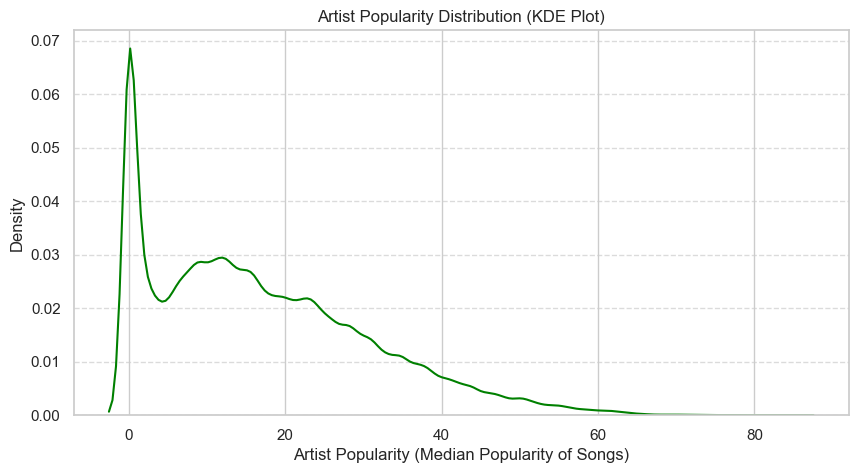

In [12]:
# Plot the distribution of artist popularity scores
plt.figure(figsize=(10, 5))
sns.kdeplot(df['artist_popularity'], color='green')
plt.xlabel("Artist Popularity (Median Popularity of Songs)")
plt.ylabel("Density")
plt.title("Artist Popularity Distribution (KDE Plot)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
df['artist_popularity'].describe()

count    1.159748e+06
mean     1.690622e+01
std      1.382647e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.500000e+01
75%      2.600000e+01
max      8.500000e+01
Name: artist_popularity, dtype: float64

In [14]:
# Define real-world artist popularity bins
bins = [0, 25,50,75, 100]
labels = ['Underground', 'Emerging', 'Mainstream', 'Superstars']

# Assign bins based on real-world artist popularity categorization
df['artist_popularity_bin'] = pd.cut(df['artist_popularity'], bins=bins, labels=labels, include_lowest=True)

df['artist_popularity_bin'].value_counts()

artist_popularity_bin
Underground    864791
Emerging       270974
Mainstream      23884
Superstars         99
Name: count, dtype: int64

### Popularity Score Distribution & Zero-Popularity Filtering

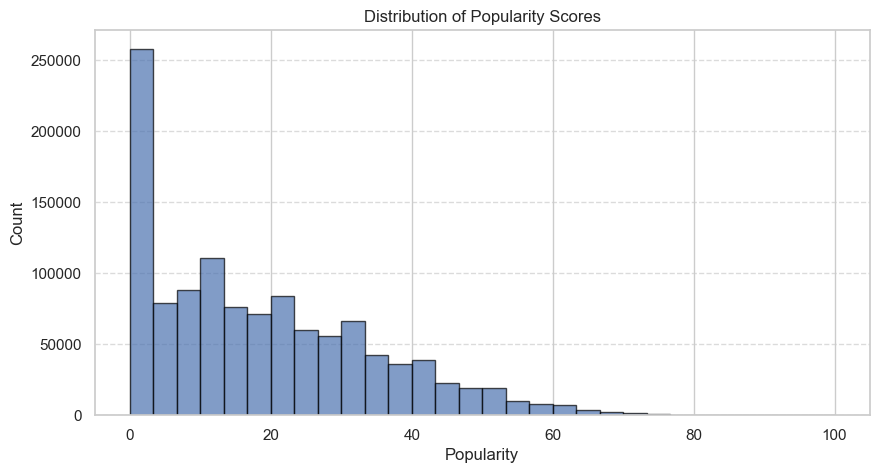

Number of songs with zero popularity: 158391
Dataset shape after removing zero-popularity songs: (1001357, 21)


In [15]:
# Visualize the distribution of song popularity scores.
# This helps identify data skewness and the presence of zero-popularity songs.

plt.figure(figsize=(10, 5))
plt.hist(df['popularity'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popularity Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Count how many songs have a popularity score of zero.
zero_popularity_count = (df['popularity'] == 0).sum()
print(f"Number of songs with zero popularity: {zero_popularity_count}")

# Remove songs with zero popularity from the dataset.
# These entries are likely unlisted, unreleased, or obscure tracks with no listener engagement.
df = df[df['popularity'] > 0]

# Confirm the dataset shape after filtering.
print(f"Dataset shape after removing zero-popularity songs: {df.shape}")


# EDA

### Current Year Trends: Top Songs and Artists

We explore the most popular songs and artists in the most recent year of the dataset.  
This gives insight into current music trends and popular tracks for that year.


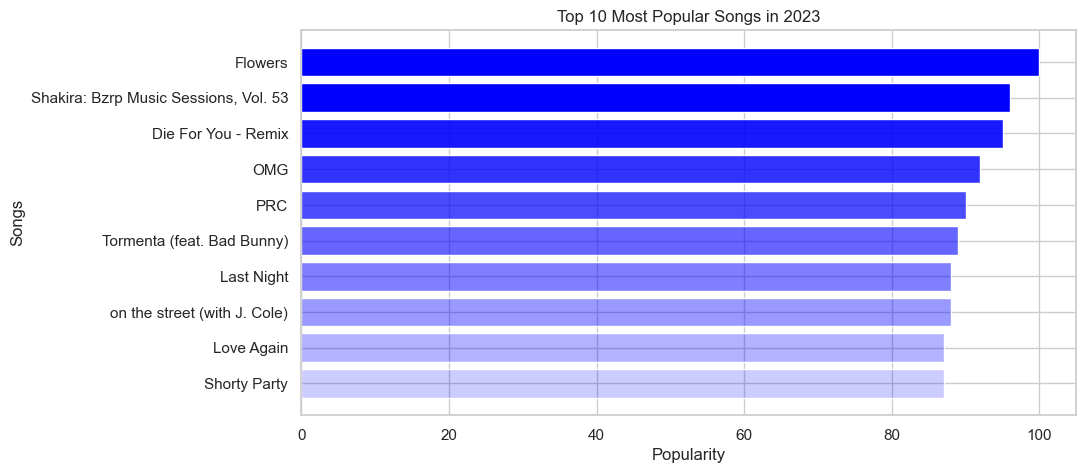

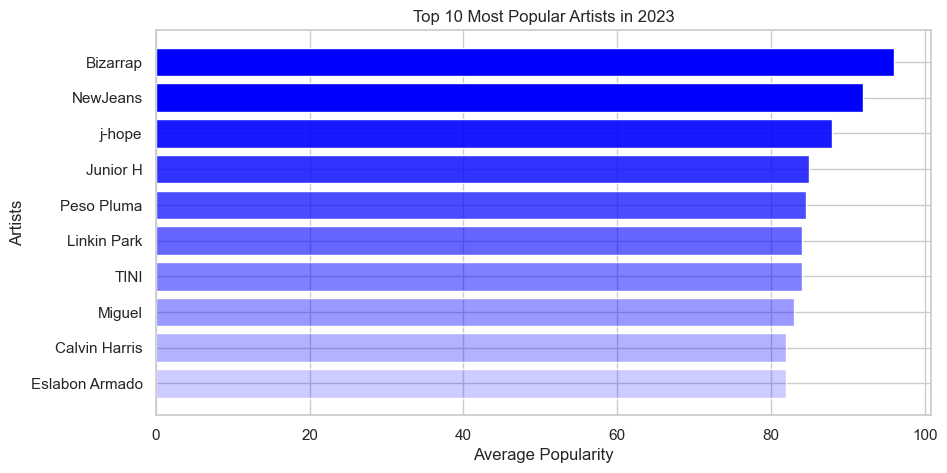

In [16]:
current_year = df['year'].max()
df_current = df[df['year'] == current_year]

# Top 10 most popular songs
top_songs = df_current.nlargest(10, 'popularity')[['track_name', 'popularity']]

# Top 10 most popular artists
top_artists = df_current.groupby('artist_name')['popularity'].mean().nlargest(10)

colors = [(0, 0, 1, alpha) for alpha in reversed([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.0])]

# Plot for top songs
plt.figure(figsize=(10, 5))
plt.barh(top_songs['track_name'], top_songs['popularity'], color=colors)
plt.xlabel('Popularity')
plt.ylabel('Songs')
plt.title(f'Top 10 Most Popular Songs in {current_year}')
plt.gca().invert_yaxis()
plt.show()

# Plot for top artists
plt.figure(figsize=(10, 5))
plt.barh(top_artists.index, top_artists.values, color=colors)
plt.xlabel('Average Popularity')
plt.ylabel('Artists')
plt.title(f'Top 10 Most Popular Artists in {current_year}')
plt.gca().invert_yaxis()
plt.show()




### Genre-Based EDA & Filtering

In this step, we:
- Explore the distribution of genres in the dataset.
- Identify the top 10 genres based on their average song popularity.
- Filter the dataset to focus on these top genres for better modeling insights.


In [17]:
# List all unique genres
unique_genres = df['genre'].unique()
print(f"Number of unique genres: {len(unique_genres)}")
print("Unique genres:", unique_genres)


Number of unique genres: 82
Unique genres: ['acoustic' 'afrobeat' 'alt-rock' 'ambient' 'black-metal' 'blues'
 'breakbeat' 'cantopop' 'chicago-house' 'chill' 'classical' 'club'
 'comedy' 'country' 'dance' 'dancehall' 'death-metal' 'deep-house'
 'detroit-techno' 'disco' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'guitar' 'hard-rock' 'hardcore'
 'hardstyle' 'heavy-metal' 'hip-hop' 'house' 'indian' 'indie-pop'
 'industrial' 'jazz' 'k-pop' 'metal' 'metalcore' 'minimal-techno'
 'new-age' 'opera' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'rock' 'rock-n-roll'
 'romance' 'sad' 'salsa' 'samba' 'sertanejo' 'show-tunes'
 'singer-songwriter' 'ska' 'sleep' 'songwriter' 'soul' 'spanish' 'swedish'
 'tango' 'techno' 'trance' 'trip-hop']


C:\Users\samue\AppData\Local\Temp\ipykernel_24684\2455993117.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index, x=genre_counts.values, palette="magma")


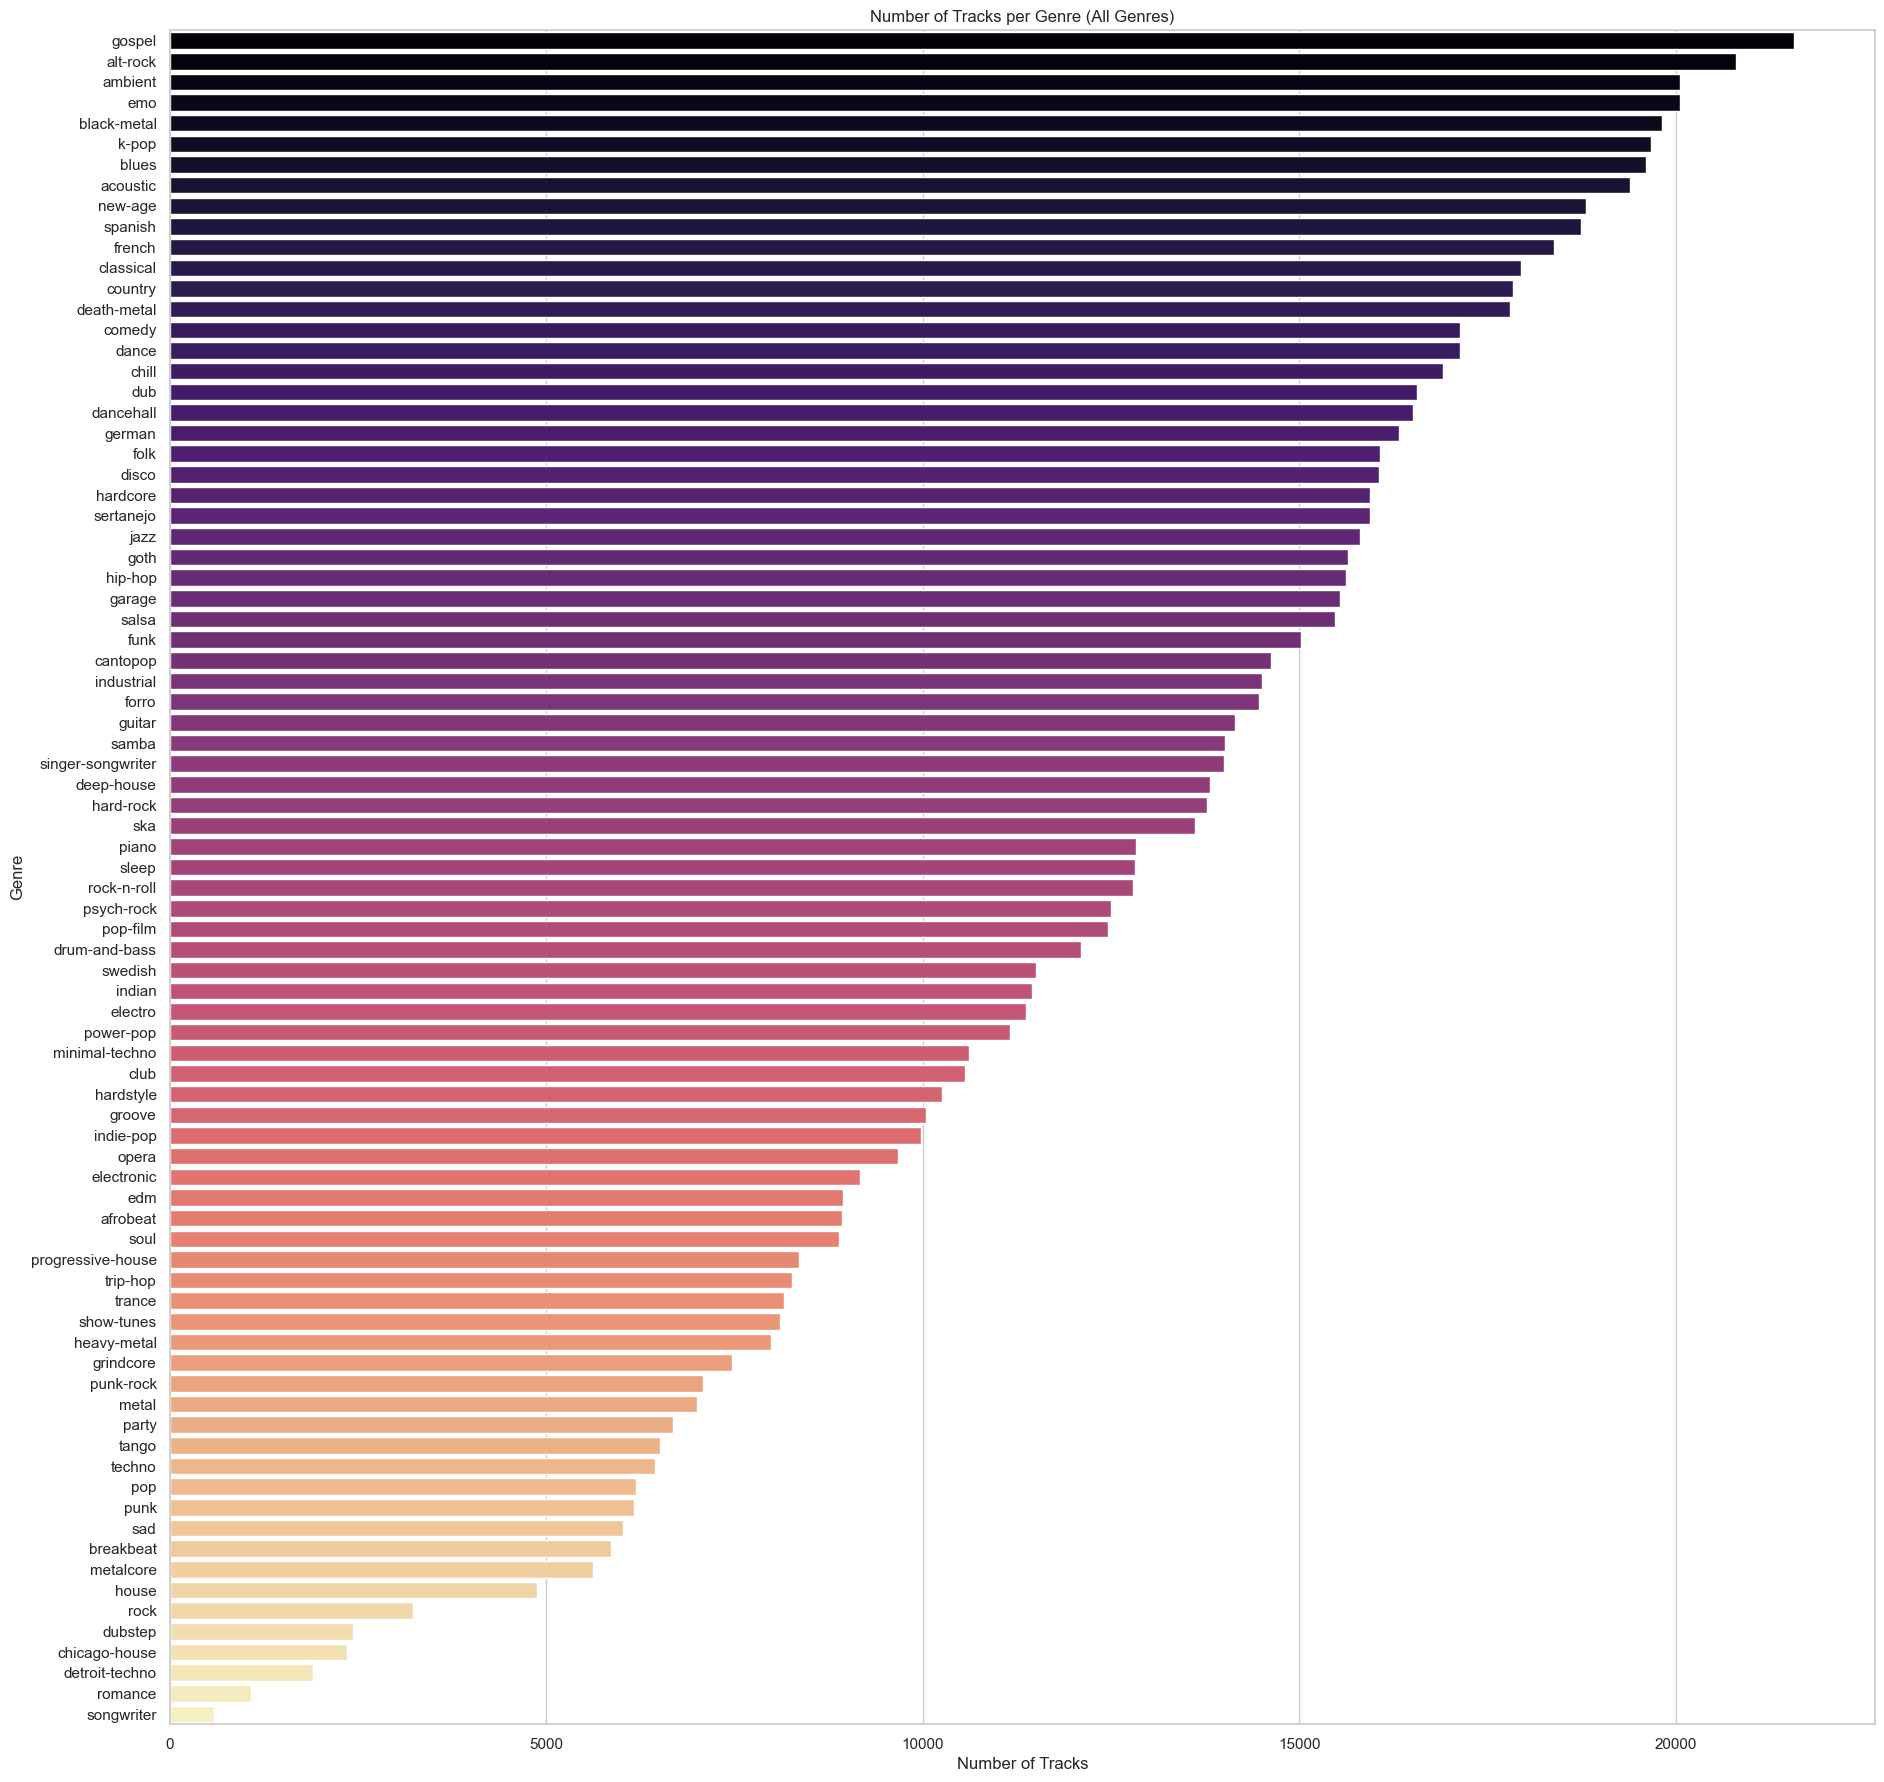

In [18]:
# Count how many songs are in each genre
plt.figure(figsize=(22, 22))
genre_counts = df['genre'].value_counts()
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette="magma")
plt.xlabel("Number of Tracks")
plt.ylabel("Genre")
plt.title("Number of Tracks per Genre (All Genres)")
plt.show()

In [19]:
# Identify the top 10 genres by mean popularity
top_genres = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(10)
print("Top 10 Genres by Average Popularity:\n", top_genres)


Top 10 Genres by Average Popularity:
 genre
pop          56.063459
rock         47.517498
hip-hop      46.561844
dance        43.247913
metal        39.800914
alt-rock     38.826969
sad          36.560785
indie-pop    35.689192
folk         33.665069
country      33.134503
Name: popularity, dtype: float64


C:\Users\samue\AppData\Local\Temp\ipykernel_24684\2623246707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_popularity.index, x=genre_popularity.values, palette="coolwarm")


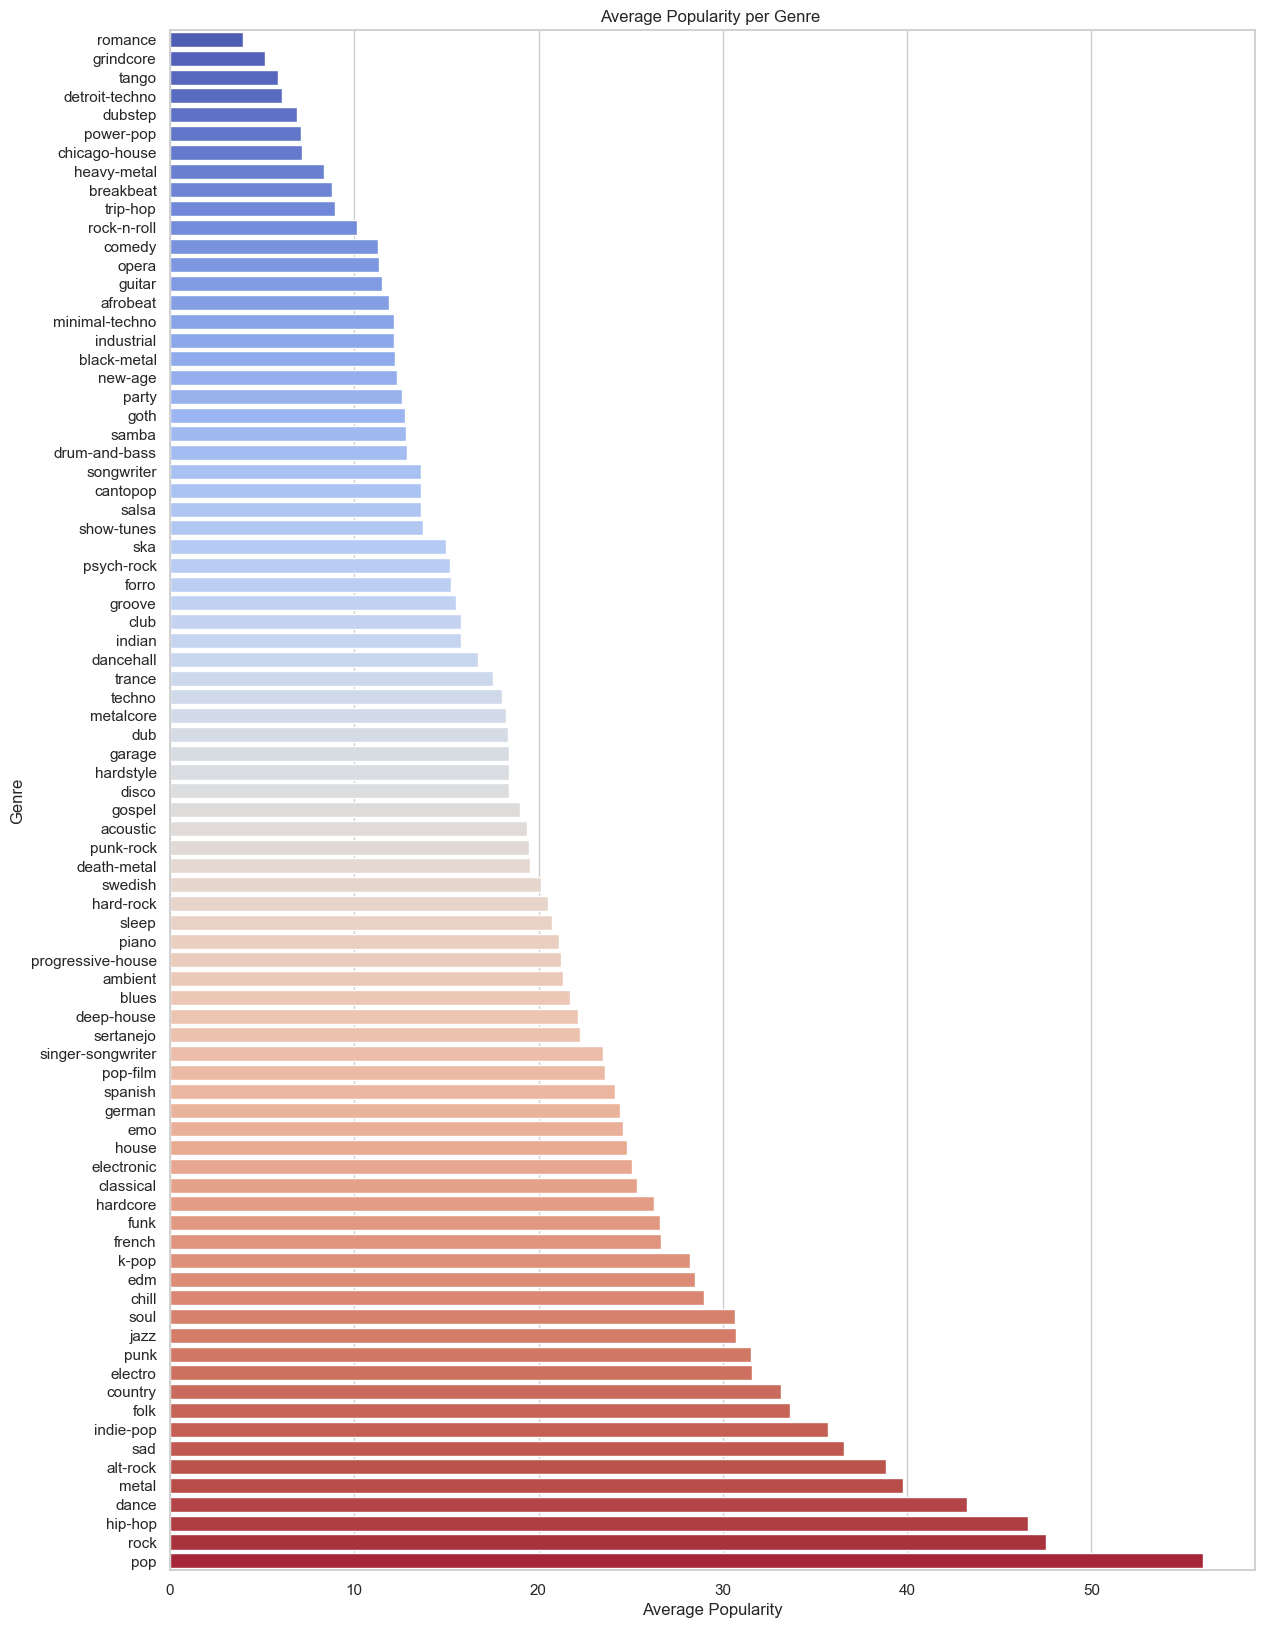

In [20]:
plt.figure(figsize=(14, 20))
genre_popularity = df.groupby('genre')['popularity'].mean().sort_values()
sns.barplot(y=genre_popularity.index, x=genre_popularity.values, palette="coolwarm")
plt.xlabel("Average Popularity")
plt.ylabel("Genre")
plt.title("Average Popularity per Genre ")
plt.show()

#### Focusing on top 10 genres

In [21]:
# Filter the dataset to include only the top 10 genres
df_final = df[df['genre'].isin(top_genres.index)]

# Confirm the shape of the filtered dataset
print(f"Shape of df_final (top genres only): {df_final.shape}")

# Check which genres are left in df_final
print("Genres in df_final:", df_final['genre'].unique())

df_final['genre'].value_counts()

Shape of df_final (top genres only): (119854, 21)
Genres in df_final: ['alt-rock' 'country' 'dance' 'folk' 'hip-hop' 'indie-pop' 'metal' 'pop'
 'rock' 'sad']


genre
alt-rock     20794
country      17836
dance        17127
folk         16066
hip-hop      15620
indie-pop     9974
metal         7002
pop           6193
sad           6013
rock          3229
Name: count, dtype: int64

C:\Users\samue\AppData\Local\Temp\ipykernel_24684\883393045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette="coolwarm")


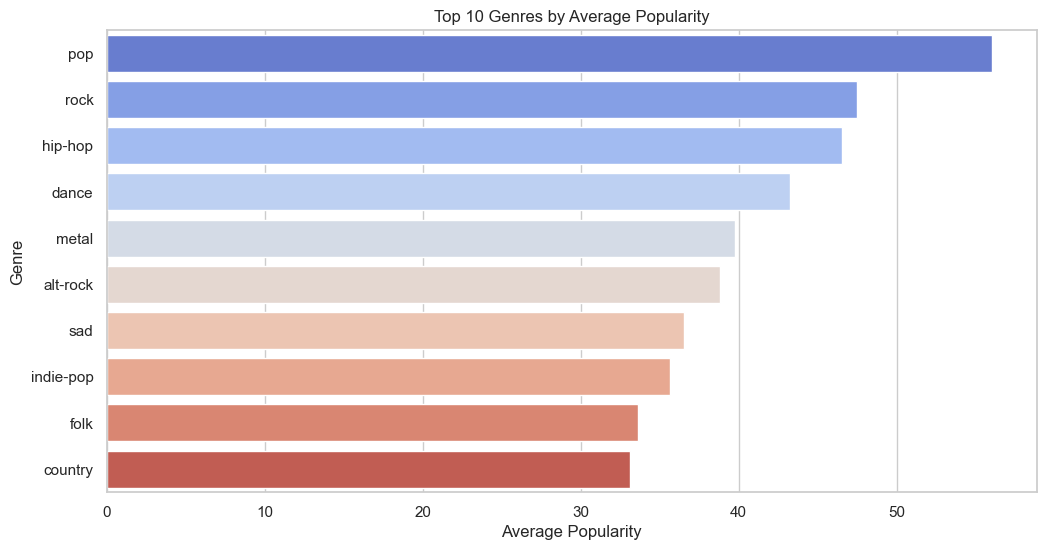

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette="coolwarm")
plt.xlabel("Average Popularity")
plt.ylabel("Genre")
plt.title("Top 10 Genres by Average Popularity")
plt.show()


Total tracks: 1001357
Total tracks in top genres: 119854
Contribution percentage: 11.969157852793758


C:\Users\samue\AppData\Local\Temp\ipykernel_24684\1819939053.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="genre", y="popularity", data=df_top_genres, palette="Set2")


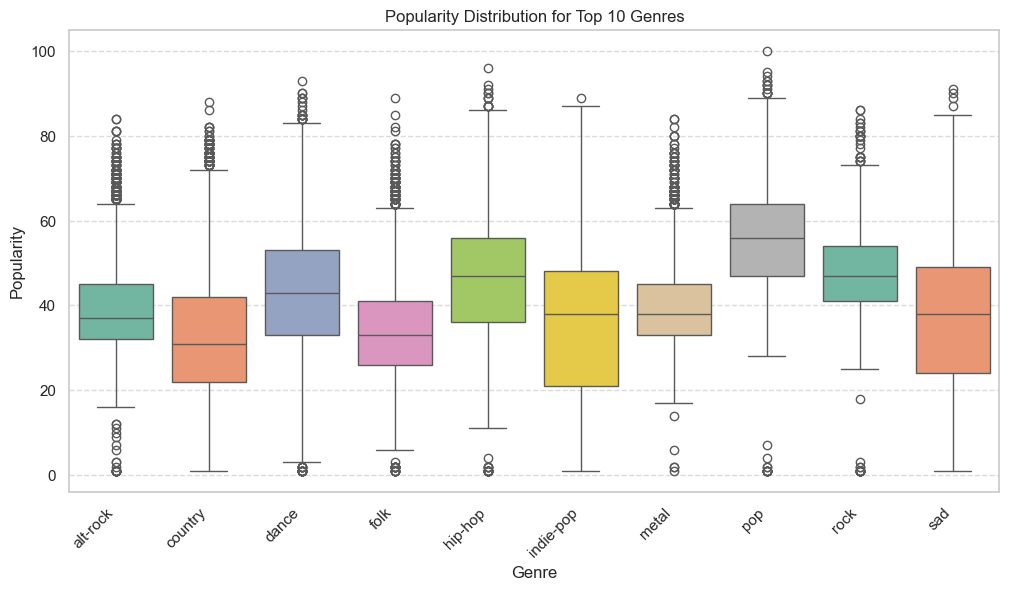

In [23]:
df_top_genres = df_final[df_final['genre'].isin(top_genres.index)]

total_tracks = len(df)
top_genres_tracks = df[df['genre'].isin(top_genres.index)].shape[0]
contribution_percentage = (top_genres_tracks / total_tracks) * 100

print('Total tracks:', total_tracks)
print('Total tracks in top genres:', top_genres_tracks)
print('Contribution percentage:', contribution_percentage)

plt.figure(figsize=(12, 6))
sns.boxplot(x="genre", y="popularity", data=df_top_genres, palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.title("Popularity Distribution for Top 10 Genres")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [24]:
#most popular artists
most_popular_artists = df_final.groupby("artist_name")["popularity"].median().sort_values(ascending=False).head(20)
most_popular_artists

artist_name
Elley Duhé                  85.0
Rema                        82.0
Chani Nattan                80.0
Jogja Hip Hop Foundation    80.0
Justine Skye                80.0
Isabel LaRosa               80.0
SunKissed Lola              80.0
Fujii Kaze                  80.0
Cian Ducrot                 79.0
Oxlade                      79.0
Soegi Bornean               78.0
Aditya A                    78.0
Duki                        77.5
Shubh                       77.5
Lasso                       77.5
Andra & The Backbone        77.0
Maria Becerra               77.0
TINI                        77.0
Marc Seguí                  77.0
Olivia Rodrigo              76.5
Name: popularity, dtype: float64

In [25]:
#most popular tracks
most_popular_tracks = df_final.groupby("track_name")["popularity"].median().sort_values(ascending=False).head(20)
most_popular_tracks

track_name
Shakira: Bzrp Music Sessions, Vol. 53                       96.0
Die For You - Remix                                         95.0
Kill Bill                                                   94.0
I'm Good (Blue)                                             93.0
Calm Down (with Selena Gomez)                               93.0
La Bachata                                                  93.0
Unholy (feat. Kim Petras)                                   92.0
Quevedo: Bzrp Music Sessions, Vol. 52                       92.0
AMG                                                         91.0
Yandel 150                                                  91.0
Until I Found You (with Em Beihold) - Em Beihold Version    91.0
Escapism.                                                   90.0
PRC                                                         90.0
Rich Flex                                                   90.0
Romantic Homicide                                           90.0
Hey Mor       

In [26]:
#find most popular artist_by_genre
most_popular_artist_by_genre = df_final.loc[df_final.groupby("genre")["popularity"].idxmax(), ["genre", "artist_name", "track_name", "popularity"]]

most_popular_artist_by_genre

,genre,artist_name,track_name,popularity
162916,alt-rock,The Neighbourhood,Daddy Issues,84
590794,country,Morgan Wallen,Last Night,88
541577,dance,David Guetta,I'm Good (Blue),93
549416,folk,Lizzy McAlpine,ceilings,89
605178,hip-hop,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",96
561970,indie-pop,JVKE,golden hour,89
608995,metal,Linkin Park,Lost,84
612503,pop,Miley Cyrus,Flowers,100
297308,rock,Imagine Dragons,Believer,86
574169,sad,Natanael Cano,AMG,91


In [27]:
# Top 5 genres based on popularity

fig = px.bar(df_final.nlargest(10, 'popularity'), x='genre', y=['popularity'], barmode='group')
fig.update_layout(yaxis_title="popularity", xaxis_title="genre", title = f'Top 5 genres based on popularity')
fig.update_layout(title={'x': 0.5, 'xanchor': 'center'})
fig.show()

In [28]:
# Select 500,000 random rows from the rest of the dataset (genres not in top 10)
df_other_genres = df[~df['genre'].isin(top_genres)].sample(n=500000, random_state=42)

# Add these rows to df_final
df_final = pd.concat([df_final, df_other_genres], ignore_index=True)


# We are adding an additional 500,000 rows that don't include the top 10 genres as it will provide the model more context to predict popularity of music if a song they release doesn't fall into one of the top 10 genres

# save the final dataset
final_dataset_path = "final_spotify_dataset.csv"
df_final.to_csv(final_dataset_path, index=False)

final_dataset_path

df_final.shape

(619854, 21)

### Top 100 most popular songs EDA

In [29]:
top_100_songs = df_final.nlargest(100, 'popularity')[['track_name', 'artist_name', 'genre', 'popularity']]

top_100_songs

# Count the number of songs in each genre from the top 100
top_100_genre_distribution = top_100_songs['genre'].value_counts()
top_100_genre_distribution

genre
pop          45
hip-hop      22
dance        13
sad           8
indie-pop     3
country       3
folk          2
garage        1
k-pop         1
sertanejo     1
rock          1
Name: count, dtype: int64

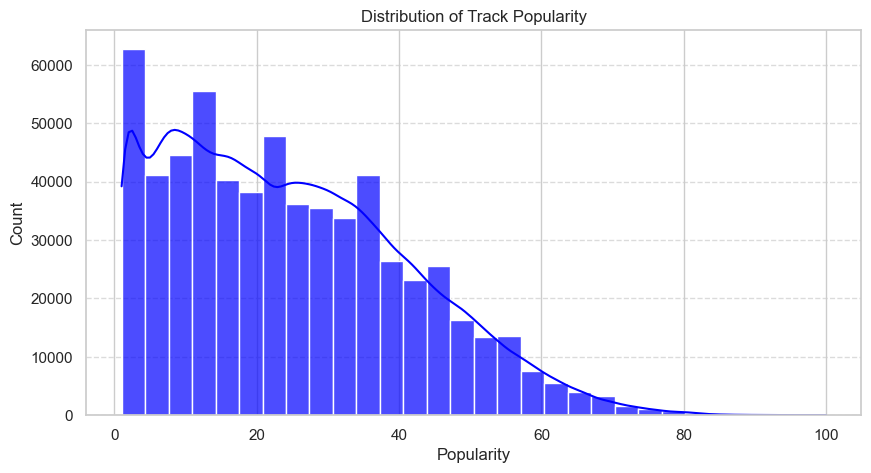

In [30]:
# Distribution of track popularity
plt.figure(figsize=(10, 5))
sns.histplot(df_final['popularity'], bins=30, kde=True, color='blue', alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Track Popularity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### More EDA

In [31]:
numerical_columns = df_final[['popularity', 'year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]

corr_matrix = numerical_columns.corr()

corr_matrix['popularity'].sort_values(ascending=False)

popularity          1.000000
year                0.313431
danceability        0.164561
loudness            0.141909
time_signature      0.033556
valence             0.019359
energy              0.015626
tempo               0.007494
key                 0.001824
mode               -0.021348
speechiness        -0.023218
acousticness       -0.085553
liveness           -0.088008
duration_ms        -0.132001
instrumentalness   -0.211257
Name: popularity, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

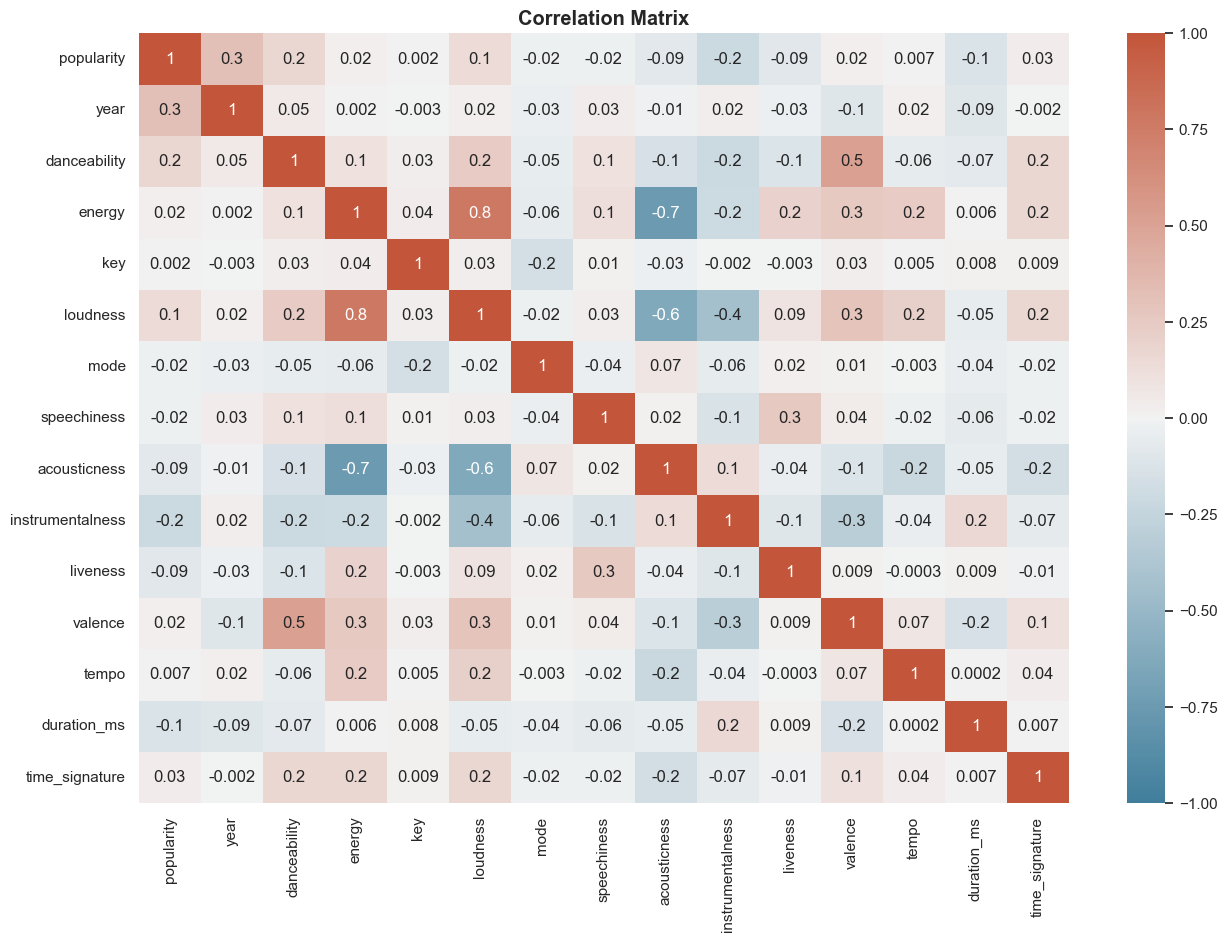

In [32]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(15, 10))
sns.heatmap(numerical_columns.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap=cmap)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')

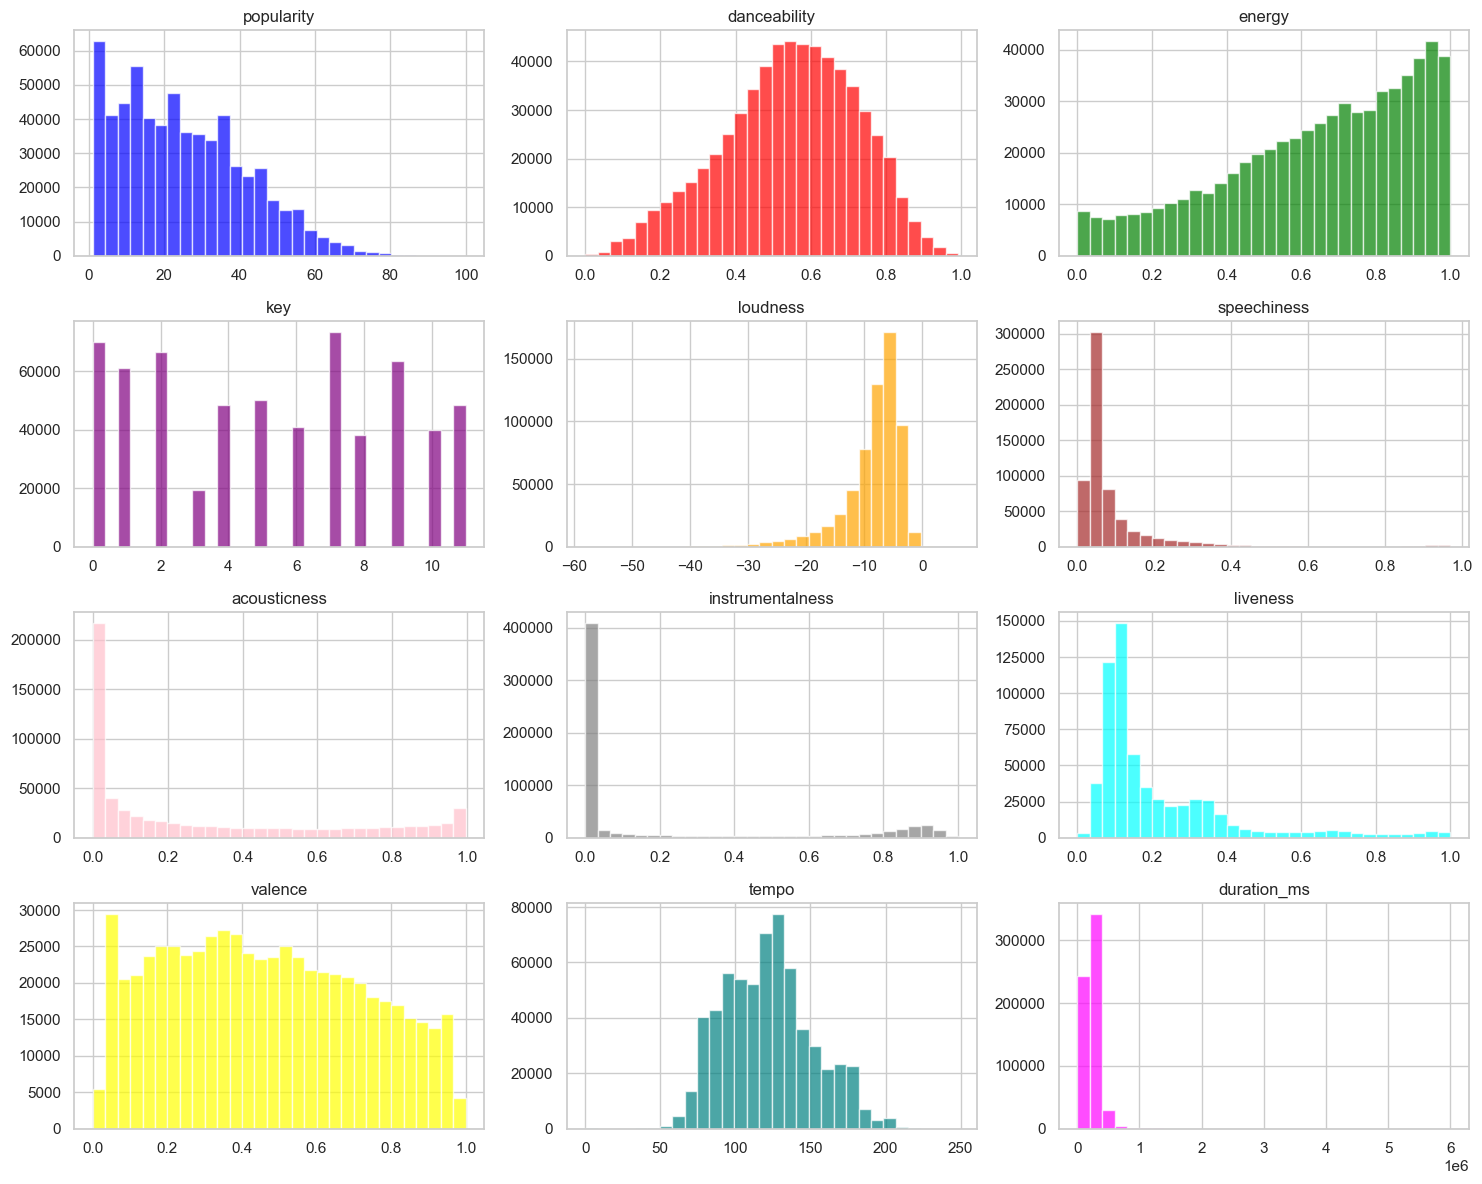

In [33]:
# Create a grid of 4 rows and 3 columns of subplots (to fit 12 plots)
fig, ax = plt.subplots(4, 3, figsize=(15, 12))

# Define the columns to plot
columns = ["popularity", "danceability", "energy", "key", "loudness", "speechiness", "acousticness",
           "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

# Define distinct colors for each plot
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'yellow', 'teal', 'magenta']

# Iterate over each column and plot its histogram in the corresponding subplot
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 3)  # Determine subplot grid position
    ax[row, col_idx].hist(df_final[col], bins=30, color=colors[i], alpha=0.7)
    ax[row, col_idx].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [34]:
# Total number of unique artists
total_artists = df_final['artist_name'].nunique()

print(f'Total number of unique artists: {total_artists}')

Total number of unique artists: 53531


In [35]:
# Artist with most number of tracks

# Count tracks per artist
artist_counts = df_final['artist_name'].value_counts().reset_index()

# Rename columns
artist_counts.columns = ['Artist', 'Number of Tracks']

artist_counts.head(10)

,Artist,Number of Tracks
0,Grateful Dead,1469
1,Johann Sebastian Bach,1035
2,Traditional,849
3,Elvis Presley,644
4,$uicideboy$,482
5,Hans Zimmer,433
6,Vybz Kartel,431
7,Ludwig van Beethoven,424
8,Wolfgang Amadeus Mozart,414
9,Armin van Buuren,396


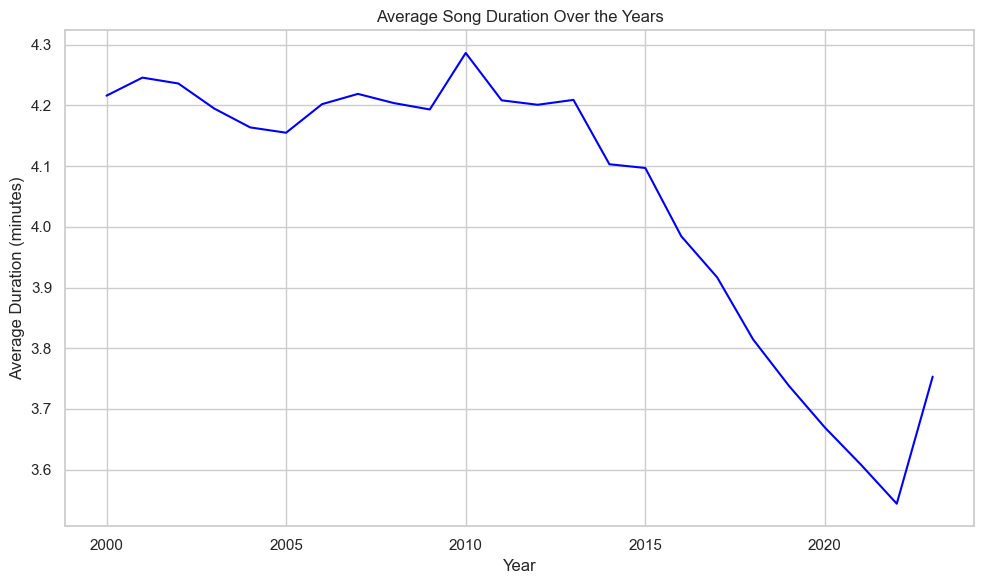

In [36]:
# Average Song Duration Over the Years

df_final['duration_mins'] = df_final['duration_ms'] / 60000

def visualize_duration_vs_year():
    year_duration = df_final.groupby('year')['duration_mins'].mean()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=year_duration.index, y=year_duration.values, color='blue')

    plt.title('Average Song Duration Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Average Duration (minutes)')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

visualize_duration_vs_year()

df_final.drop(columns=['duration_mins'], inplace=True)

In [37]:
# Top 5 artists based on popularity and their associated features

fig = px.bar(df_final.nlargest(5, 'popularity'), x='artist_name', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.update_layout(yaxis_title="audio feature", xaxis_title="artist", title = f'Top 5 artists based on popularity and their audio features')
fig.update_layout(title={'x': 0.5, 'xanchor': 'center'})
fig.show()

# Part 2: Finding Our Best Overall Model

In [38]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import joblib

c:\Users\samue\Anaconda3\envs\ml1\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [39]:
# drop unneeded variables before running our model (artist_unpopularity_bin actually just creates noise as we already have artist_popularity)
df_final.drop(columns=['artist_popularity_bin'], inplace=True)

# also drop the key variable as what key the song is in makes no difference in how popular it should be and will just create noise
df_final.drop(columns=['key'], inplace=True)

# Define categorical and numerical features
categorical_columns = ['genre', 'time_signature']   #time signature is a categorical variable even if it appears as numerical
numerical_columns = ['year', 'danceability', 'energy', 'loudness',
                     'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'duration_ms', 'artist_popularity']

# One-Hot Encode categorical features
df_final = pd.get_dummies(df_final, columns=categorical_columns, drop_first=True)

# Scale only the necessary numerical features
features_to_scale = ['year', 'tempo', 'duration_ms','artist_popularity']
scaler = StandardScaler()
df_final[features_to_scale] = scaler.fit_transform(df_final[features_to_scale])

# Define target and features FIRST before converting to float
X = df_final.drop(columns=['popularity', 'track_id', 'track_name', 'artist_name'], axis=1)
y = df_final['popularity']

# Ensure all X columns are float (for SHAP and other numeric models)
X = X.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Final dataset shape: {X_train.shape}, {X_test.shape}")

# We don't use PCA here as PCA reduces interpretability and Treebased models like Random Forest (which was already our best performing model) doesn't require PCA

Final dataset shape: (495883, 98), (123971, 98)


In [40]:
### **STAGE 1: TRAIN ALL MODELS QUICKLY WITH DEFAULT PARAMETERS**

# Train Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Train Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_y_pred))
lasso_r2 = r2_score(y_test, lasso_y_pred)

# Train Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
random_forest_model.fit(X_train, y_train)
rf_y_pred = random_forest_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, eval_metric='rmse', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
xgb_r2 = r2_score(y_test, xgb_y_pred)

# not running a Support Vector Regression on the final code because it always performed with worse RMSE and R^2 than our other best models on samples, and it was to computationally intense to run on the full dataset

# Train Support Vector Regression (SVR)
#svr_model = SVR(kernel='rbf', C=100, gamma=0.1)
#svr_model.fit(X_train, y_train)
#svr_y_pred = svr_model.predict(X_test)
#svr_rmse = np.sqrt(mean_squared_error(y_test, svr_y_pred))
#svr_r2 = r2_score(y_test, svr_y_pred)

# Train Gradient Boosting Regressor (GBR)
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)
gbr_y_pred = gbr_model.predict(X_test)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_y_pred))
gbr_r2 = r2_score(y_test, gbr_y_pred)

# Evaluate Models
models = {
    "Ridge Regression": (ridge_rmse, ridge_r2),
    "Lasso Regression": (lasso_rmse, lasso_r2),
    "Random Forest": (rf_rmse, rf_r2),
    "XGBoost": (xgb_rmse, xgb_r2),
    # "Support Vector Regression": (svr_rmse, svr_r2),
    "Gradient Boosting Regressor": (gbr_rmse, gbr_r2)
}

for name, (rmse, r2) in models.items():
    print(f"{name} RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

# Store actual trained models (so we can access the best one later)
trained_models = {
    "Ridge Regression": ridge,
    "Lasso Regression": lasso,
    "Random Forest": random_forest_model,
    "XGBoost": xgb_model,
   # "Support Vector Regression": svr_model,
    "Gradient Boosting Regressor": gbr_model
}

# Find the best model based on RMSE
best_model_name, (best_rmse, best_r2) = min(models.items(), key=lambda x: x[1][0])
print(f"Best Model: {best_model_name} with RMSE {best_rmse:.4f} and R² {best_r2:.4f}")

Ridge Regression RMSE: 8.8993, R² Score: 0.7138
Lasso Regression RMSE: 8.9590, R² Score: 0.7100
Random Forest RMSE: 7.5418, R² Score: 0.7945
XGBoost RMSE: 8.4738, R² Score: 0.7405
Gradient Boosting Regressor RMSE: 8.8100, R² Score: 0.7195
Best Model: Random Forest with RMSE 7.5418 and R² 0.7945


In [41]:
### **STAGE 2: RUN RANDOMIZED SEARCH ONLY ON THE BEST MODEL** (since the dataset is too large to run on all, especially SVM)

best_model = trained_models[best_model_name] # Get the best model

# Define hyperparameter grids for tuning
param_grids = {
    "Ridge Regression": {'alpha': [0.1, 1.0, 10.0, 100.0]},
    "Lasso Regression": {'alpha': [0.01, 0.1, 1.0, 10.0]},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    "XGBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
   # "Support Vector Regression": {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    "Gradient Boosting Regressor": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Perform hyperparameter tuning only for the best model
print(f"Running RandomizedSearchCV for {best_model_name}...")
best_model_grid = RandomizedSearchCV(
    best_model, param_grids[best_model_name],
    cv=3, scoring='neg_mean_squared_error', n_iter=10, n_jobs=-1, random_state=42
)
best_model_grid.fit(X_train, y_train)
best_model_tuned = best_model_grid.best_estimator_

# Evaluate the fine-tuned best model
y_pred_tuned = best_model_tuned.predict(X_test)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
tuned_r2 = r2_score(y_test, y_pred_tuned)

print(f"Fine-tuned {best_model_name} RMSE: {tuned_rmse:.4f}, R² Score: {tuned_r2:.4f}")

# Save the fine-tuned best model
model_filename = f"best_model_{best_model_name.replace(' ', '_')}.pkl"
joblib.dump(best_model_tuned, model_filename)
print(f"Saved best model: {model_filename}")

Running RandomizedSearchCV for Random Forest...


c:\Users\samue\Anaconda3\envs\ml1\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning:

The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.



Fine-tuned Random Forest RMSE: 7.5204, R² Score: 0.7956
Saved best model: best_model_Random_Forest.pkl


Running SHAP analysis for Random Forest...


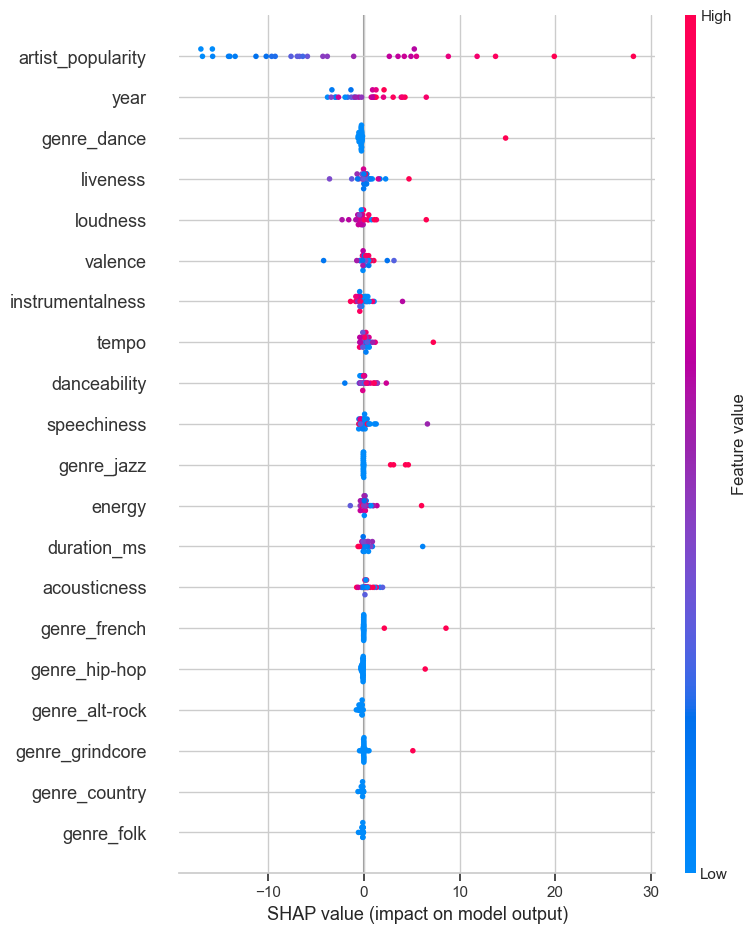

In [43]:
### **STAGE 3: SHAP ANALYSIS (ONLY IF BEST MODEL SUPPORTS IT)**
if best_model_name in ["Random Forest", "XGBoost", "Gradient Boosting Regressor"]:
    print(f"Running SHAP analysis for {best_model_name}...")

    # Load the saved best model
    best_model_loaded = joblib.load(model_filename)

    # Take a small, consistent sample (30 rows for performance)
    sample_X = X_test.sample(30, random_state=42)

    # Use TreeExplainer explicitly (optimized for tree-based models)
    explainer = shap.TreeExplainer(best_model_loaded, feature_perturbation="interventional")

    # Get SHAP values for the sample
    shap_values = explainer.shap_values(sample_X, check_additivity=False)

    # Initialize JS visualization
    shap.initjs()

    # Plot SHAP summary
    shap.summary_plot(shap_values, sample_X)

else:
    print(f"SHAP analysis not supported for {best_model_name}.")

### Also Trying a Neural Network

In [44]:
# Define the Neural Network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer 1
    Dense(32, activation='relu'),  # Hidden layer 2
    Dense(1, activation='linear')  # Output layer (linear activation for regression)
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train the model
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)

# Make predictions on the test set
nn_y_pred = nn_model.predict(X_test).flatten()

# Calculate RMSE
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_y_pred))
print(f"Neural Network RMSE: {nn_rmse:.4f}")

# Calculate R^2 Score
nn_r2 = r2_score(y_test, nn_y_pred)
print(f"Neural Network R² Score: {nn_r2:.4f}")

c:\Users\samue\Anaconda3\envs\ml1\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
13947/13947 ━━━━━━━━━━━━━━━━━━━━ 15s 982us/step - loss: 84.0018 - val_loss: 73.1668
Epoch 2/50
13947/13947 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 72.9136 - val_loss: 70.7585
Epoch 3/50
13947/13947 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 72.1529 - val_loss: 70.5403
Epoch 4/50
13947/13947 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 72.2145 - val_loss: 70.8903
Epoch 5/50
13947/13947 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 71.1987 - val_loss: 70.7880
Epoch 6/50
13947/13947 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 71.3719 - val_loss: 70.5414
Epoch 7/50
13947/13947 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 70.8932 - val_loss: 70.3112
Epoch 8/50
13947/13947 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 70.8482 - val_loss: 71.5304
Epoch 9/50
13947/13947 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 70.2784 - val_loss: 73.2248
Epoch 10/50
13947/13947 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 70.7604 - val_loss: 69.8628
Epoch 11/50
13947/13947 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 7

### And an Ensemble Model

In [45]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define base models
base_models = [
    ('bagging', BaggingRegressor(estimator=LinearRegression(), n_estimators=10, random_state=42)),
    ('random_forest', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)),
]

# Define stacking model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
stacked_model.fit(X_train, y_train)

# Predict on test data
y_pred = stacked_model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
n = len(y_test)  # Number of samples
k = len(X_train.columns)  # Number of predictors
rss = np.sum((y_test - y_pred) ** 2)  # Residual sum of squares
aic = n * np.log(rss / n) + 2 * k
aicc = aic + (2 * k * (k + 1)) / (n - k - 1)

print(f"Stacking Model RMSE: {rmse:.4f}")
print(f"Stacking Model R² Score: {r2:.4f}")
print(f"Stacking Model AICc: {aicc:.4f}")

# Store model performance
model_performance = {"Stacking Model": (rmse, r2)}

Stacking Model RMSE: 7.5749
Stacking Model R² Score: 0.7927
Stacking Model AICc: 502239.5700


## Model Based on Algorithmic Clusters using PCA

We perform clustering on the dataset to group songs with similar characteristics.  
This step helps uncover hidden structures and potential mood/genre groupings in the data.


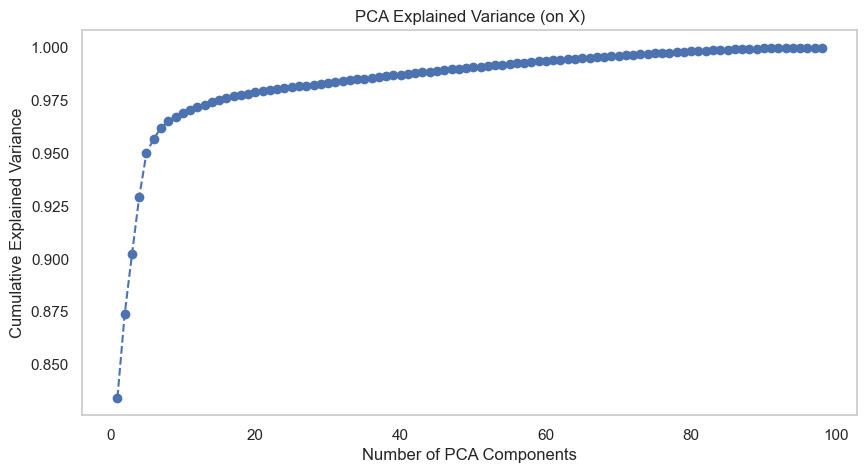

In [46]:
# Import necessary libraries (if not already imported)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

# For clustering and PCA, reuse X (it's already numeric and clean)
clustering_features = X.copy()

# Apply PCA on the preprocessed feature set
pca_full = PCA()
pca_full.fit(clustering_features)

# Calculate cumulative explained variance
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance (on X)")
plt.grid()
plt.show()

In [47]:
# Perform PCA on ALL of X 
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Store PCA components in a single DataFrame for all data
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(5)])

# Confirm the shape matches your X shape
print(f"PCA transformed data shape: {df_pca.shape}")

PCA transformed data shape: (619854, 5)


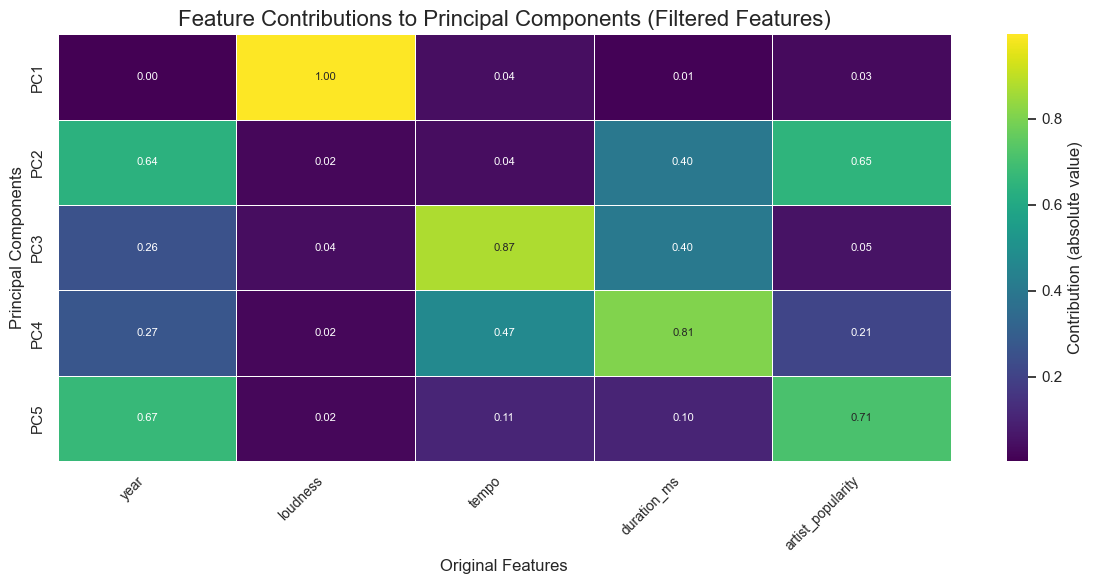

In [48]:
# Get PCA loadings
pca_loadings = pd.DataFrame(
    pca.components_, 
    columns=X.columns, 
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Create a mask for features that contribute significantly to any component
important_features = pca_loadings.abs().max(axis=0) > 0.1

# Filter the loadings
pca_loadings_filtered = pca_loadings.loc[:, important_features]

# Plot filtered loadings
plt.figure(figsize=(12, 6))

sns.heatmap(
    pca_loadings_filtered.abs(),
    cmap="viridis",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Contribution (absolute value)"},
    annot_kws={"size": 8}
)

plt.xlabel("Original Features", fontsize=12)
plt.ylabel("Principal Components", fontsize=12)
plt.title("Feature Contributions to Principal Components (Filtered Features)", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


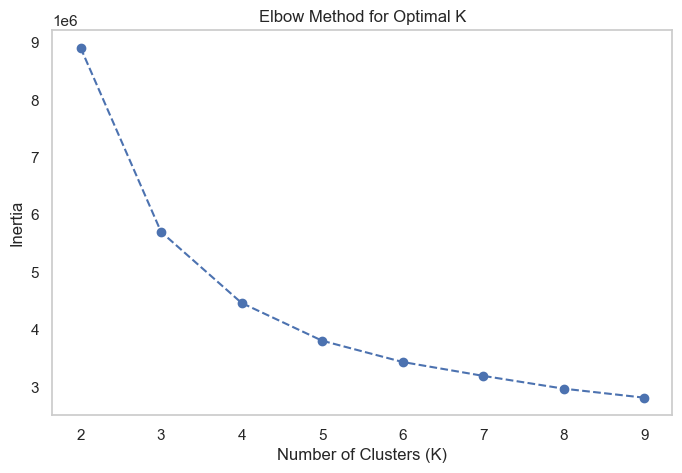

In [49]:
# Elbow method to determine the optimal number of clusters (We are using the K-Means Method because the data appears VERY globular/spherical)
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()


In [50]:
# Apply K-Means clustering (the optimal number of clusters appears to be 4 based on the elbow method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Get cluster labels and assign them to the original dataset
df_final["cluster"] = kmeans.fit_predict(df_pca)

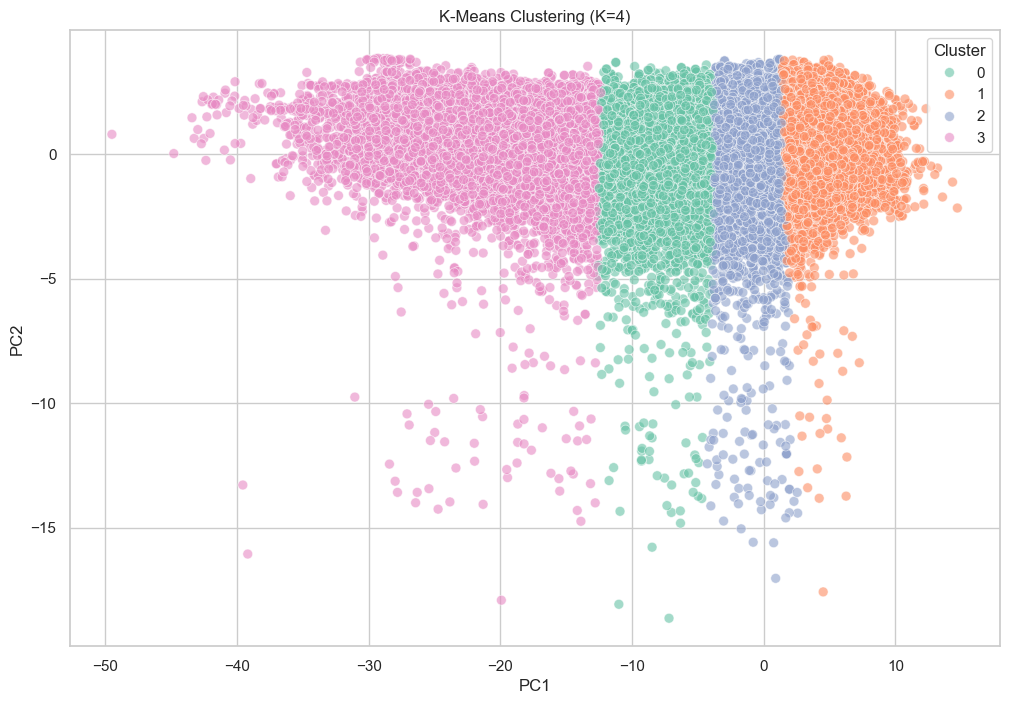

In [51]:
# Add the cluster labels to the PCA dataframe for visualization (optional but clean)
df_pca['cluster'] = df_final['cluster']

# Plot the PCA-reduced data, colored by KMeans cluster assignments
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='cluster',
    palette='Set2',
    alpha=0.6, # Adjust alpha for better visibility
    s=50       # Marker size
)

plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()


In [52]:
# Required Imports
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

# Lists to store metrics for each cluster
cluster_rmses = []
cluster_r2s = []

# Iterate over each cluster in the dataset
for cluster_id in df_final['cluster'].unique():
    print(f"\nProcessing Cluster {cluster_id}...\n")

    # Filter data for the current cluster
    cluster_data = df_final[df_final['cluster'] == cluster_id]

    # Define features (drop irrelevant columns) and target
    X_cluster = cluster_data.drop(columns=['popularity', 'track_id', 'track_name', 'artist_name'])
    y_cluster = cluster_data['popularity']

    # Ensure features are floats for compatibility with models
    X_cluster = X_cluster.astype(float)

    # Train-test split for current cluster
    X_train, X_test, y_train, y_test = train_test_split(
        X_cluster, y_cluster, test_size=0.2, random_state=42
    )

    print(f"Cluster {cluster_id} dataset shape: {X_train.shape}, {X_test.shape}")
    
    # Define models to evaluate
    models = {
        'Ridge': Ridge(random_state=42),
        'Lasso': Lasso(random_state=42),
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
        'XGBoost': XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1),
        'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }

    # Evaluate each model
    best_model = None
    best_model_name = ''
    best_rmse = float('inf')
    best_r2 = None

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        print(f"{name} RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

        # Select the best model by RMSE
        if rmse < best_rmse:
            best_rmse = rmse
            best_r2 = r2
            best_model = model
            best_model_name = name

    # Save best model for this cluster
    model_filename = f"best_model_cluster_{cluster_id}_{best_model_name}.pkl"
    joblib.dump(best_model, model_filename)

    print(f"\nBest Model for Cluster {cluster_id}: {best_model_name} with RMSE {best_rmse:.4f} and R² {best_r2:.4f}")
    print(f"Saved best model for Cluster {cluster_id} as {model_filename}\n")

    # Store metrics
    cluster_rmses.append(best_rmse)
    cluster_r2s.append(best_r2)

# Overall results summary
print("\nSummary of Cluster-Based Models Performance:\n")
for idx, cluster_id in enumerate(df_final['cluster'].unique()):
    print(f"Cluster {cluster_id}: RMSE = {cluster_rmses[idx]:.4f}, R² = {cluster_r2s[idx]:.4f}")



Processing Cluster 1...

Cluster 1 dataset shape: (243756, 99), (60939, 99)
Ridge RMSE: 9.2230, R² Score: 0.7080
Lasso RMSE: 10.0409, R² Score: 0.6540
RandomForest RMSE: 7.8080, R² Score: 0.7908
XGBoost RMSE: 8.5269, R² Score: 0.7505
GradientBoosting RMSE: 9.1024, R² Score: 0.7156

Best Model for Cluster 1: RandomForest with RMSE 7.8080 and R² 0.7908
Saved best model for Cluster 1 as best_model_cluster_1_RandomForest.pkl


Processing Cluster 2...

Cluster 2 dataset shape: (171664, 99), (42916, 99)
Ridge RMSE: 8.7199, R² Score: 0.7178
Lasso RMSE: 9.3707, R² Score: 0.6741
RandomForest RMSE: 7.6629, R² Score: 0.7821
XGBoost RMSE: 8.1252, R² Score: 0.7550
GradientBoosting RMSE: 8.6421, R² Score: 0.7228

Best Model for Cluster 2: RandomForest with RMSE 7.6629 and R² 0.7821
Saved best model for Cluster 2 as best_model_cluster_2_RandomForest.pkl


Processing Cluster 0...

Cluster 0 dataset shape: (60704, 99), (15176, 99)
Ridge RMSE: 8.0694, R² Score: 0.6817
Lasso RMSE: 8.6789, R² Score: 0.63

In [53]:
df_final.drop(columns=['cluster'], inplace=True)

# Part 4: Modeling using Genre and Mood Clusters

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load the dataset
df = pd.read_csv('spotify_data.csv')

In [5]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [6]:
# Display basic information
print(f"Dataset shape: {df.shape}")

Dataset shape: (1159764, 20)


In [7]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Unnamed: 0           0
artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64


In [8]:
# Simple way to drop rows with missing values
df = df.dropna()
print(f"Shape after dropping rows with missing values: {df.shape} -> {df.shape}")

Shape after dropping rows with missing values: (1159748, 20) -> (1159748, 20)


In [9]:
df = df.drop(columns=['track_id', 'track_name', 'artist_name'])

In [10]:
df = df.drop(columns=['Unnamed: 0'])

## Let's classify our songs by mood

# Mood Classification Approach

* **Framework Used**: Thayer/Russell model of musical emotion
  
* **Primary Dimensions**:
  * Valence (musical positiveness/happiness)
  * Energy (intensity/arousal)

* **Threshold Selection**:
  * Used standard midpoint of 0.5 for both dimensions
  * Creates four intuitive mood quadrants
  * Aligns with normalized Spotify audio features (0-1 scale)

* **Mood Categories**:
  * **Happy/Energetic**: High valence (≥0.5) + High energy (≥0.5)
  * **Peaceful/Relaxed**: High valence (≥0.5) + Low energy (<0.5)
  * **Angry/Tense**: Low valence (<0.5) + High energy (≥0.5)
  * **Sad/Depressed**: Low valence (<0.5) + Low energy (<0.5)

* **Justification**:
  * Grounded in established music psychology research
  * Provides clear, interpretable categories
  * Enables direct comparison of popularity prediction models across mood types
  * Avoids arbitrary thresholds by using standard midpoints

In [11]:
# Step 1: Function to assign moods based on valence and energy
def assign_mood(row):
    """Assign mood label based on Thayer model thresholds"""
    if row['valence'] >= 0.5 and row['energy'] >= 0.5:
        return "Happy/Energetic"  # High valence, high energy
    elif row['valence'] >= 0.5 and row['energy'] < 0.5:
        return "Peaceful/Relaxed"  # High valence, low energy
    elif row['valence'] < 0.5 and row['energy'] >= 0.5:
        return "Angry/Tense"  # Low valence, high energy
    else:
        return "Sad/Depressed"  # Low valence, low energy

In [12]:
# Step 2: Apply the mood classification to the dataframe
def classify_songs_by_mood(df):
    """Apply mood classification to songs based on audio features"""
    # Create a copy to avoid modifying the original
    df_moods = df.copy()
    
    # Apply the mood assignment function
    df_moods['mood_label'] = df_moods.apply(assign_mood, axis=1)
    
    return df_moods

In [13]:
df_with_moods = classify_songs_by_mood(df)

In [14]:
# Step 3: Analyze the mood distribution
def analyze_mood_distribution(df_moods):
    """Analyze and display mood distribution statistics"""
    # Display the distribution of moods
    print("Mood distribution:")
    mood_counts = df_moods['mood_label'].value_counts()
    print(mood_counts)
    
    # Calculate percentages
    mood_percentages = df_moods['mood_label'].value_counts(normalize=True) * 100
    print("\nPercentage distribution:")
    for mood, percentage in mood_percentages.items():
        print(f"{mood}: {percentage:.1f}%")
    
    # Look at average audio features by mood
    mood_features = df_moods.groupby('mood_label')[
        ['valence', 'energy', 'danceability', 'acousticness', 
         'instrumentalness', 'tempo', 'loudness']
    ].mean()
    
    print("\nAverage audio features by mood:")
    print(mood_features)
    
    return mood_counts, mood_features

In [15]:
# Then analyze the mood distribution
mood_counts, mood_features = analyze_mood_distribution(df_with_moods)

Mood distribution:
mood_label
Happy/Energetic     415170
Angry/Tense         406532
Sad/Depressed       251438
Peaceful/Relaxed     86608
Name: count, dtype: int64

Percentage distribution:
Happy/Energetic: 35.8%
Angry/Tense: 35.1%
Sad/Depressed: 21.7%
Peaceful/Relaxed: 7.5%

Average audio features by mood:
                   valence    energy  danceability  acousticness  \
mood_label                                                         
Angry/Tense       0.274559  0.800799      0.492348      0.115178   
Happy/Energetic   0.727080  0.772064      0.627835      0.219054   
Peaceful/Relaxed  0.679698  0.359201      0.621856      0.630243   
Sad/Depressed     0.222715  0.257170      0.432022      0.718072   

                  instrumentalness       tempo   loudness  
mood_label                                                 
Angry/Tense               0.288763  126.243263  -6.650786  
Happy/Energetic           0.138861  124.472668  -6.578804  
Peaceful/Relaxed          0.225239  117.07

In [16]:
# Step 4: Visualize the mood classification
def visualize_mood_classification(df_moods):
    """Create visualization of mood classification"""
    # Create a visualization
    plt.figure(figsize=(12, 8))
    
    # Define colors for each mood
    colors = {'Happy/Energetic': 'gold', 
              'Peaceful/Relaxed': 'lightgreen', 
              'Angry/Tense': 'red', 
              'Sad/Depressed': 'blue'}
    
    # Sample to avoid overcrowding the plot
    sample = df_moods.sample(min(5000, len(df_moods)))
    
    # Plot each mood category
    for mood, color in colors.items():
        mood_data = sample[sample['mood_label'] == mood]
        plt.scatter(mood_data['valence'], mood_data['energy'], 
                   color=color, label=mood, alpha=0.6)
    
    # Add dividing lines at 0.5 for both axes
    plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
    plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    
    # Add quadrant labels
    plt.text(0.25, 0.75, "Angry/Tense", horizontalalignment='center', fontsize=12)
    plt.text(0.75, 0.75, "Happy/Energetic", horizontalalignment='center', fontsize=12)
    plt.text(0.25, 0.25, "Sad/Depressed", horizontalalignment='center', fontsize=12)
    plt.text(0.75, 0.25, "Peaceful/Relaxed", horizontalalignment='center', fontsize=12)
    
    plt.title('Song Mood Classification Based on Thayer Model', fontsize=16)
    plt.xlabel('Valence (Musical Positiveness)', fontsize=14)
    plt.ylabel('Energy', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Step 5: Main function to run the entire classification process
def categorize_songs_by_mood(df):
    """Main function to run the mood classification process"""
    # Apply the classification
    df_moods = classify_songs_by_mood(df)
    
    # Analyze the distribution
    analyze_mood_distribution(df_moods)
    
    # Create visualization
    visualize_mood_classification(df_moods)
    
    return df_moods

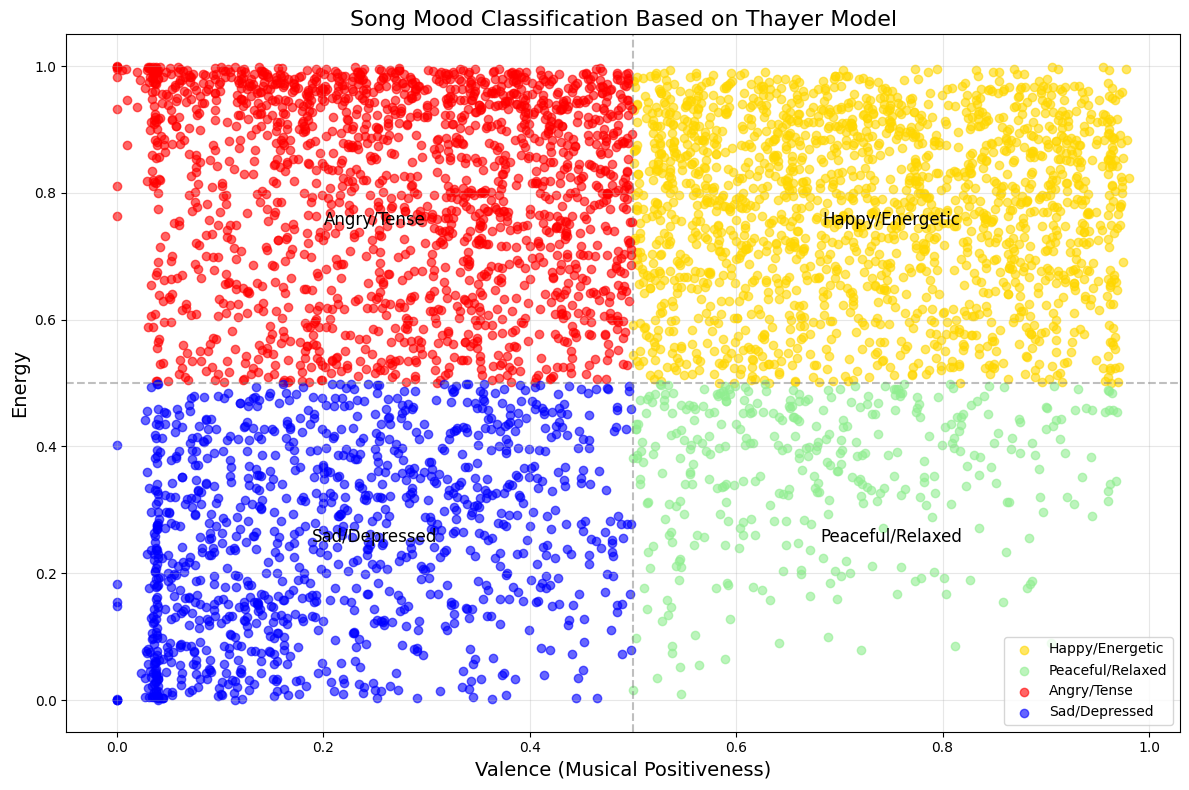

In [17]:
# Finally visualize the classification
visualize_mood_classification(df_with_moods)

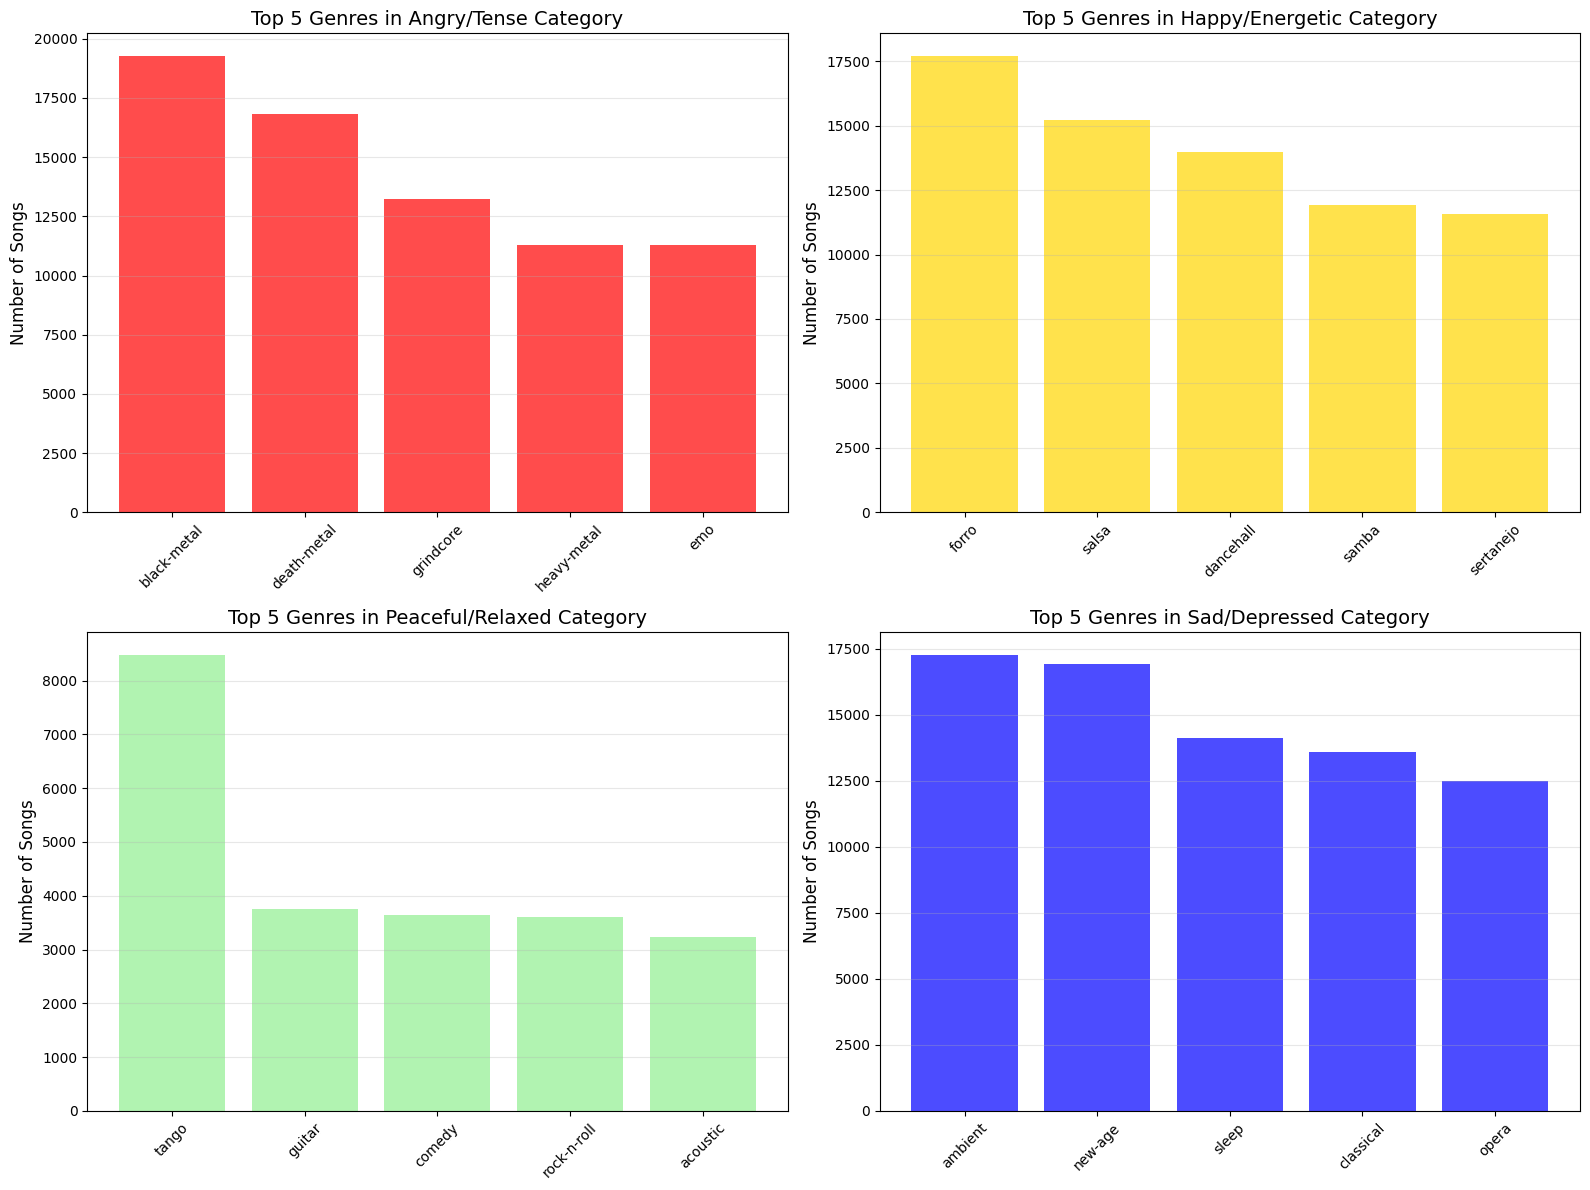

Top 5 genres in each mood category:

Angry/Tense:
  black-metal: 19265 songs (4.7%)
  death-metal: 16803 songs (4.1%)
  grindcore: 13251 songs (3.3%)
  heavy-metal: 11299 songs (2.8%)
  emo: 11295 songs (2.8%)

Happy/Energetic:
  forro: 17693 songs (4.3%)
  salsa: 15234 songs (3.7%)
  dancehall: 13965 songs (3.4%)
  samba: 11920 songs (2.9%)
  sertanejo: 11557 songs (2.8%)

Peaceful/Relaxed:
  tango: 8482 songs (9.8%)
  guitar: 3762 songs (4.3%)
  comedy: 3648 songs (4.2%)
  rock-n-roll: 3602 songs (4.2%)
  acoustic: 3231 songs (3.7%)

Sad/Depressed:
  ambient: 17281 songs (6.9%)
  new-age: 16940 songs (6.7%)
  sleep: 14116 songs (5.6%)
  classical: 13612 songs (5.4%)
  opera: 12483 songs (5.0%)


In [18]:
def analyze_genre_by_mood(df_with_moods, top_n=5):
    """
    Analyze and visualize the distribution of top genres within each mood category
    
    Parameters:
    df_with_moods (pandas.DataFrame): DataFrame with mood classification
    top_n (int): Number of top genres to show for each mood
    """
    # Create a figure with subplots for each mood
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    # Define colors for each mood
    mood_colors = {
        'Happy/Energetic': 'gold',
        'Peaceful/Relaxed': 'lightgreen',
        'Angry/Tense': 'red',
        'Sad/Depressed': 'blue'
    }
    
    # Get all moods
    moods = df_with_moods['mood_label'].unique()
    
    # For each mood, plot the top genres
    for i, mood in enumerate(sorted(moods)):
        # Filter for this mood
        mood_data = df_with_moods[df_with_moods['mood_label'] == mood]
        
        # Get top genres for this mood
        top_genres = mood_data['genre'].value_counts().head(top_n)
        
        # Plot
        axes[i].bar(top_genres.index, top_genres.values, color=mood_colors[mood], alpha=0.7)
        axes[i].set_title(f'Top {top_n} Genres in {mood} Category', fontsize=14)
        axes[i].set_ylabel('Number of Songs', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Also create a table showing percentage of each genre in each mood
    print(f"Top {top_n} genres in each mood category:")
    for mood in sorted(moods):
        mood_data = df_with_moods[df_with_moods['mood_label'] == mood]
        top_genres = mood_data['genre'].value_counts().head(top_n)
        total = len(mood_data)
        
        print(f"\n{mood}:")
        for genre, count in top_genres.items():
            percentage = (count / total) * 100
            print(f"  {genre}: {count} songs ({percentage:.1f}%)")

# Call the function to analyze genre distribution by mood
analyze_genre_by_mood(df_with_moods)

In [19]:
pd.set_option('display.max_columns', None)
df_with_moods.head()

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,mood_label
0,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3,Sad/Depressed
1,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4,Peaceful/Relaxed
2,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4,Sad/Depressed
3,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4,Peaceful/Relaxed
4,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4,Angry/Tense


## Modeling and Comparison with the "Base" Model 

In [20]:
print("Columns in df before dropping 'year':")
print(df.columns)

if 'year' in df.columns:
    df.drop(columns=['year'], inplace=True, errors='ignore')
    print("'year' column dropped successfully.")
else:
    print("'year' column is not present in the DataFrame.")


Columns in df before dropping 'year':
Index(['popularity', 'year', 'genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')
'year' column dropped successfully.


In [21]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#############################################################################
# 1. Load and Prepare the Full Dataset
#############################################################################
df_full = df_with_moods.copy()
print(f"Full dataset size: {len(df_full):,} rows")

# Take a 15% random sample
sample_fraction = 0.15
df = df_full.sample(frac=sample_fraction, random_state=42)
print(f"Sampled dataset size (10%): {len(df):,} rows")

# If you want to drop 'artist_popularity' or other columns:
if 'artist_popularity' in df.columns:
    df.drop(columns=['artist_popularity'], inplace=True, errors='ignore')

# (Optional) If you WANT to drop 'year':
# if 'year' in df.columns:
#     df.drop(columns=['year'], inplace=True, errors='ignore')

print("Columns before encoding:", df.columns.tolist())

# 2. Encode 'genre' + 'mood_label'
#    - For 'genre', we can use drop_first=True to avoid the dummy trap
#    - For 'mood_label', keep all dummies (drop_first=False)
df = pd.get_dummies(df, columns=['genre'], drop_first=True)
df = pd.get_dummies(df, columns=['mood_label'], prefix='mood', drop_first=False)

print("Columns after encoding:", df.columns.tolist())

#############################################################################
# 3. Scale Numerical Features
#############################################################################
numerical_columns = [
    'year', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'
]
scaler = StandardScaler()

# Only scale columns that actually exist in df
for col in numerical_columns:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])

print("Scaling complete.")

#############################################################################
# 4. Train/Test Split for the General Model (All Rows)
#############################################################################
X = df.drop(columns=['popularity','track_id','track_name','artist_name'], errors='ignore')
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

general_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
general_model.fit(X_train, y_train)

# Evaluate
general_preds = general_model.predict(X_test)
general_rmse = np.sqrt(mean_squared_error(y_test, general_preds))
general_r2 = r2_score(y_test, general_preds)

print(f"\n=== General Model (All Data) ===")
print(f"RMSE: {general_rmse:.4f}")
print(f"R²:   {general_r2:.4f}")

# Save the general model
joblib.dump(general_model, "model_general_all_data.pkl")
print("Saved: 'model_general_all_data.pkl'")

#############################################################################
# 5. Train One Model per Mood Using the Already-Transformed Data
#############################################################################
moods = df_with_moods['mood_label'].unique()
mood_models = {}
mood_metrics = []

for mood in moods:
    # Because we used get_dummies(mood_label, drop_first=False, prefix='mood'),
    # the dummy column is "mood_<mood>" as it appears in the original df.
    # Replace any spaces or slashes in the mood string to match how get_dummies named it.
    # For example, a mood "Angry/Tense" typically becomes "mood_Angry/Tense".
    # But if your mood has spaces, it might become "mood_Angry_Tense", etc.
    # Let's see how pandas actually named them:
    
    dummy_col = f"mood_{mood}"
    # If your mood has special characters, you might need to confirm the exact naming in df.columns
    
    if dummy_col not in df.columns:
        print(f"Skipping mood '{mood}' because '{dummy_col}' not found in columns.")
        continue
    
    # Filter the entire DF for this mood
    df_mood = df[df[dummy_col] == 1].copy()
    
    # If there's not enough data, skip it
    if len(df_mood) < 50:
        print(f"Skipping mood '{mood}' -> only {len(df_mood)} rows.")
        continue
    
    X_mood = df_mood.drop(columns=['popularity','track_id','track_name','artist_name'], errors='ignore')
    y_mood = df_mood['popularity']
    
    X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
        X_mood, y_mood, test_size=0.2, random_state=42
    )
    
    # Train
    mood_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    mood_model.fit(X_train_m, y_train_m)
    
    # Evaluate
    mood_preds = mood_model.predict(X_test_m)
    mood_rmse = np.sqrt(mean_squared_error(y_test_m, mood_preds))
    mood_r2 = r2_score(y_test_m, mood_preds)
    
    print(f"\n=== Mood '{mood}' Model ===")
    print(f"RMSE: {mood_rmse:.4f}")
    print(f"R²:   {mood_r2:.4f}")
    
    # Save
    safe_mood_name = mood.replace("/", "_").replace(" ", "_")  # Clean up for filename
    model_filename = f"model_mood_{safe_mood_name}.pkl"
    joblib.dump(mood_model, model_filename)
    print(f"Saved: '{model_filename}'")
    
    # Store
    mood_models[mood] = mood_model
    mood_metrics.append({
        'mood': mood,
        'rmse': mood_rmse,
        'r2': mood_r2,
        'n_samples': len(df_mood)
    })

#############################################################################
# 6. Summary of All Mood Models
#############################################################################
print("\n=== Summary of Mood-Specific Models ===")
for metric in mood_metrics:
    print(f"Mood: {metric['mood']}, N={metric['n_samples']} | RMSE={metric['rmse']:.4f}, R²={metric['r2']:.4f}")


Full dataset size: 1,159,748 rows
Sampled dataset size (10%): 173,962 rows
Columns before encoding: ['popularity', 'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'mood_label']
Columns after encoding: ['popularity', 'year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'genre_afrobeat', 'genre_alt-rock', 'genre_ambient', 'genre_black-metal', 'genre_blues', 'genre_breakbeat', 'genre_cantopop', 'genre_chicago-house', 'genre_chill', 'genre_classical', 'genre_club', 'genre_comedy', 'genre_country', 'genre_dance', 'genre_dancehall', 'genre_death-metal', 'genre_deep-house', 'genre_detroit-techno', 'genre_disco', 'genre_drum-and-bass', 'genre_dub', 'genre_dubstep', 'genre_edm', 'genre_electro', 'genre_electronic', 'genre_emo', 'genre_fo

## Genre + Mood Clustering

In [22]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#############################################################################
# 1. Load Your Data and Identify Top 5 Genres
#############################################################################

df = df_with_moods.copy()

# (Optional) Drop columns not needed:
for col in ['artist_popularity']:  # or 'year' if you want to drop it
    if col in df.columns:
        df.drop(columns=[col], inplace=True, errors='ignore')

# Suppose these are your 4 moods:
# If your dataset has these exact 4, confirm strings match what's in your data
all_moods = ["Happy/Energetic", "Angry/Tense", "Peaceful/Relaxed", "Sad/Depressed"]

# Count genres and pick top 5
top_5_genres = df['genre'].value_counts().head(5).index.tolist()
print("Top 5 genres:", top_5_genres)

# Filter dataset to only those top 5 genres
df_top5 = df[df['genre'].isin(top_5_genres)].copy()
print(f"Filtered to top-5 genres: {len(df_top5):,} rows total.")

#############################################################################
# 2. Encode Genre & Mood in a Single Pass
#############################################################################

# We'll include ALL mood labels (not dropping the first), so each mood has a column.
# For genre, you can choose drop_first=True or False. If you set True, you'll have
# one fewer column. But let's set drop_first=False so each of the top 5 has its own dummy.
df_top5 = pd.get_dummies(df_top5, columns=['genre'], drop_first=False)
df_top5 = pd.get_dummies(df_top5, columns=['mood_label'], prefix='mood', drop_first=False)

print("After encoding, columns:", df_top5.columns.tolist())

#############################################################################
# 3. Scale Numeric Columns
#############################################################################

numerical_columns = [
    'year', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'
]

scaler = StandardScaler()
for col in numerical_columns:
    if col in df_top5.columns:
        df_top5[col] = scaler.fit_transform(df_top5[[col]])

#############################################################################
# 4. (Optional) Train a "General" Model on This Top-5-Genre Dataset
#############################################################################

X_general = df_top5.drop(columns=['popularity','track_id','track_name','artist_name'], errors='ignore')
y_general = df_top5['popularity']

X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_general, y_general, test_size=0.2, random_state=42)

general_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
general_model.fit(X_train_g, y_train_g)

gen_preds = general_model.predict(X_test_g)
gen_rmse = np.sqrt(mean_squared_error(y_test_g, gen_preds))
gen_r2 = r2_score(y_test_g, gen_preds)

print("\n=== General Model (Top-5 Genres) ===")
print(f"RMSE: {gen_rmse:.4f}, R²: {gen_r2:.4f}")

joblib.dump(general_model, "model_general_top5.pkl")
print("Saved model_general_top5.pkl\n")

#############################################################################
# 5. Genre + Mood Submodels
#############################################################################

genre_mood_metrics = []
genre_mood_models = {}

for genre in top_5_genres:
    # The dummy column for this genre is 'genre_<genre>'
    genre_col = f"genre_{genre}"
    
    # Check if that column exists
    if genre_col not in df_top5.columns:
        print(f"Skipping genre '{genre}' -> no dummy column found.")
        continue
    
    for mood in all_moods:
        # The dummy column for this mood is 'mood_<mood>'
        # But be mindful if your mood name has spaces/slashes; 
        # For example, "Angry/Tense" -> "mood_Angry/Tense" or "mood_Angry_Tense"
        # Let's see exactly how get_dummies named it. Usually it uses underscores for spaces.
        # Actually, let's check the real columns in df_top5 to confirm. 
        # For demonstration, let's assume it becomes "mood_Angry/Tense".
        
        mood_col = f"mood_{mood}"
        
        if mood_col not in df_top5.columns:
            print(f"Skipping mood '{mood}' -> no dummy column named '{mood_col}' found.")
            continue
        
        # Filter for the combination
        df_subset = df_top5[(df_top5[genre_col] == 1) & (df_top5[mood_col] == 1)].copy()
        n_rows = len(df_subset)
        
        if n_rows < 50:
            print(f"Skipping combo (genre='{genre}', mood='{mood}') -> only {n_rows} rows.")
            continue
        
        # Build features & target
        X_sub = df_subset.drop(columns=['popularity','track_id','track_name','artist_name'], errors='ignore')
        y_sub = df_subset['popularity']
        
        # Train/test split
        X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)
        
        # Train a model
        combo_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        combo_model.fit(X_train_s, y_train_s)
        
        # Evaluate
        preds_s = combo_model.predict(X_test_s)
        rmse_s = np.sqrt(mean_squared_error(y_test_s, preds_s))
        r2_s = r2_score(y_test_s, preds_s)
        
        # Save
        # Make a "safe" filename in case your genre or mood strings have slashes/spaces
        safe_genre = genre.replace("/", "_").replace(" ", "_")
        safe_mood = mood.replace("/", "_").replace(" ", "_")
        model_filename = f"model_genre_{safe_genre}_mood_{safe_mood}.pkl"
        joblib.dump(combo_model, model_filename)
        
        print(f"Trained combo: (Genre='{genre}', Mood='{mood}') -> N={n_rows}, RMSE={rmse_s:.4f}, R²={r2_s:.4f}")
        print(f"Saved: {model_filename}\n")
        
        # Store results
        genre_mood_models[(genre, mood)] = combo_model
        genre_mood_metrics.append({
            'genre': genre,
            'mood': mood,
            'n_rows': n_rows,
            'rmse': rmse_s,
            'r2': r2_s
        })

#############################################################################
# 6. Summary of Genre+Mood Models
#############################################################################

print("\n=== Summary of (Genre, Mood) Models ===")
for gm in genre_mood_metrics:
    print(f"Genre='{gm['genre']}', Mood='{gm['mood']}', N={gm['n_rows']}, "
          f"RMSE={gm['rmse']:.4f}, R²={gm['r2']:.4f}")


Top 5 genres: ['black-metal', 'gospel', 'ambient', 'acoustic', 'alt-rock']
Filtered to top-5 genres: 106,862 rows total.
After encoding, columns: ['popularity', 'year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'genre_acoustic', 'genre_alt-rock', 'genre_ambient', 'genre_black-metal', 'genre_gospel', 'mood_Angry/Tense', 'mood_Happy/Energetic', 'mood_Peaceful/Relaxed', 'mood_Sad/Depressed']

=== General Model (Top-5 Genres) ===
RMSE: 9.2960, R²: 0.5951
Saved model_general_top5.pkl

Trained combo: (Genre='black-metal', Mood='Happy/Energetic') -> N=614, RMSE=8.1305, R²=0.0936
Saved: model_genre_black-metal_mood_Happy_Energetic.pkl

Trained combo: (Genre='black-metal', Mood='Angry/Tense') -> N=19265, RMSE=7.5115, R²=0.2530
Saved: model_genre_black-metal_mood_Angry_Tense.pkl

Skipping combo (genre='black-metal', mood='Peaceful/Relaxed') -> only 30 rows.
Trained combo

In [23]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#############################################################################
# 1. Filter Data to Top 5 Genres
#############################################################################
df = df_with_moods.copy()

# (Optional) drop columns you don't want
for col in ["artist_popularity"]:
    if col in df.columns:
        df.drop(columns=[col], inplace=True, errors='ignore')

# Identify top 5 genres
top_5_genres = df['genre'].value_counts().head(5).index.tolist()
print("Top 5 genres:", top_5_genres)

df_top5 = df[df['genre'].isin(top_5_genres)].copy()
print(f"Filtered to top-5 genres: {len(df_top5):,} rows.")

#############################################################################
# 2. Encode 'genre' + 'mood_label', Scale Numeric Columns
#############################################################################
df_top5 = pd.get_dummies(df_top5, columns=['genre'], drop_first=False)
df_top5 = pd.get_dummies(df_top5, columns=['mood_label'], prefix='mood', drop_first=False)

# List numeric columns to scale
numerical_columns = [
    'year', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'
]

scaler = StandardScaler()
for col in numerical_columns:
    if col in df_top5.columns:
        df_top5[col] = scaler.fit_transform(df_top5[[col]])

print("Encoding & scaling complete. Columns now:", df_top5.columns.tolist())

#############################################################################
# 3. Prepare Features & Target
#############################################################################
X = df_top5.drop(columns=['popularity','track_id','track_name','artist_name'], errors='ignore')
y = df_top5['popularity']

# (Optional) remove any leftover indexing columns
for c in ['Unnamed: 0']:
    if c in X.columns:
        X.drop(columns=[c], inplace=True)

print("Feature matrix size:", X.shape)

#############################################################################
# 4. K-Fold Cross-Validation on the Entire Top-5-Genre Dataset
#############################################################################
def cross_validate_rf(X, y, n_splits=5, random_seed=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
    r2_scores = []
    rmse_scores = []
    
    for train_idx, valid_idx in kf.split(X):
        X_train_fold = X.iloc[train_idx]
        X_valid_fold = X.iloc[valid_idx]
        y_train_fold = y.iloc[train_idx]
        y_valid_fold = y.iloc[valid_idx]
        
        # Train
        rf = RandomForestRegressor(n_estimators=100, random_state=random_seed, n_jobs=-1)
        rf.fit(X_train_fold, y_train_fold)
        
        # Predict
        preds_fold = rf.predict(X_valid_fold)
        
        # Metrics
        fold_r2 = r2_score(y_valid_fold, preds_fold)
        fold_rmse = np.sqrt(mean_squared_error(y_valid_fold, preds_fold))
        
        r2_scores.append(fold_r2)
        rmse_scores.append(fold_rmse)
    
    return np.mean(r2_scores), np.mean(rmse_scores)

avg_r2, avg_rmse = cross_validate_rf(X, y, n_splits=5)
print(f"\n=== K-Fold CV Results (Top-5 Genres) ===")
print(f"Average R² (5 folds):  {avg_r2:.4f}")
print(f"Average RMSE (5 folds): {avg_rmse:.4f}")

#############################################################################
# 5. Final Model on ALL Data + Feature Importances
#############################################################################
final_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
final_model.fit(X, y)

# Evaluate on the same data (just to see how it fits overall)
preds_all = final_model.predict(X)
final_r2 = r2_score(y, preds_all)
final_rmse = np.sqrt(mean_squared_error(y, preds_all))

print(f"\n=== Final Model (Trained on entire top-5 dataset) ===")
print(f"R² on training set:   {final_r2:.4f}")
print(f"RMSE on training set: {final_rmse:.4f}")

# Save the final model
joblib.dump(final_model, "model_general_top5_final.pkl")
print("Saved: model_general_top5_final.pkl")

# Feature Importances
feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False).reset_index(drop=True)

print("\nTop 10 Features by Importance:")
print(feat_importances.head(10).to_string(index=False))


Top 5 genres: ['black-metal', 'gospel', 'ambient', 'acoustic', 'alt-rock']
Filtered to top-5 genres: 106,862 rows.
Encoding & scaling complete. Columns now: ['popularity', 'year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'genre_acoustic', 'genre_alt-rock', 'genre_ambient', 'genre_black-metal', 'genre_gospel', 'mood_Angry/Tense', 'mood_Happy/Energetic', 'mood_Peaceful/Relaxed', 'mood_Sad/Depressed']
Feature matrix size: (106862, 23)

=== K-Fold CV Results (Top-5 Genres) ===
Average R² (5 folds):  0.5957
Average RMSE (5 folds): 9.3376

=== Final Model (Trained on entire top-5 dataset) ===
R² on training set:   0.9438
RMSE on training set: 3.4814
Saved: model_general_top5_final.pkl

Top 10 Features by Importance:
          feature  importance
   genre_alt-rock    0.342569
             year    0.161087
genre_black-metal    0.048945
      duration_ms    0.048236
  

In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 1. Assume we already have a DataFrame `df` with columns including "popularity".
df = df_with_moods.copy()

# A. Minimal data prep for demonstration (if you haven't already encoded, etc.)
# Let's just do a quick example with the numeric columns directly
# In practice, you'd do your usual data prep: drop columns, get_dummies, scale, etc.

feature_cols = ['danceability','energy','loudness','tempo']  # for simplicity
df = df.dropna(subset=['popularity'] + feature_cols)  # remove rows missing these

X = df[feature_cols]
y = df['popularity']

# B. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

################################################################################
# 2. Random Baseline
################################################################################

# - We'll create predictions for y_test by randomly sampling from y_train's min-max range.
#   Alternatively, you could sample from the entire dataset's min-max.

y_min = y_train.min()
y_max = y_train.max()

# Generate random predictions for each test sample
random_preds = np.random.uniform(low=y_min, high=y_max, size=len(y_test))

# Evaluate random baseline
rand_rmse = np.sqrt(mean_squared_error(y_test, random_preds))
rand_r2   = r2_score(y_test, random_preds)

print(f"=== Random Baseline ===")
print(f"RMSE: {rand_rmse:.4f}")
print(f"R²:   {rand_r2:.4f}\n")

################################################################################
# 3. Random Forest Model
################################################################################

model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

rf_preds = model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2   = r2_score(y_test, rf_preds)

print(f"=== Random Forest ===")
print(f"RMSE: {rf_rmse:.4f}")
print(f"R²:   {rf_r2:.4f}")


=== Random Baseline ===
RMSE: 45.6487
R²:   -7.2732

=== Random Forest ===
RMSE: 15.5293
R²:   0.0425


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib  # For saving/loading models
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Assume df_with_moods is already loaded in your environment
df = df_with_moods.copy()

# 2. Drop 'artist_popularity' as requested
if 'artist_popularity' in df.columns:
    df.drop(columns=['artist_popularity'], inplace=True, errors='ignore')

# 2. Drop 'year' as requested
if 'year' in df.columns:
    df.drop(columns=['year'], inplace=True, errors='ignore')

# 3. Identify all moods
moods = df['mood_label'].unique()

# 4. Find the smallest mood subset size
mood_subset_sizes = []
for mood in moods:
    size = len(df[df['mood_label'] == mood])
    mood_subset_sizes.append(size)

min_size = min(mood_subset_sizes)

# 5. Create the sampled data for the General Model (5% sample)
sample_fraction = 0.05
df_general_sample = df.sample(frac=sample_fraction, random_state=42)

print(f"Total dataset size: {len(df)}")
print(f"General model sample size (5%): {len(df_general_sample)}")

# 6. Create separate subsets for each mood with equal size = min_size
mood_dataframes = {}
for mood in moods:
    mood_df = df[df['mood_label'] == mood]
    # Sample 'min_size' rows from this mood subset
    mood_sampled = mood_df.sample(n=min_size, random_state=42)
    mood_dataframes[mood] = mood_sampled.copy()

# 7. Concatenate these mood dataframes if you need the *combined* mood dataset
#    (Typically you won't combine them for separate training, but let's keep an option)
df_mood_equal_sized = pd.concat(mood_dataframes.values(), ignore_index=True)

# Encode categorical features
# For 'genre', drop the first category
df_general_encoded = pd.get_dummies(df_general_sample, columns=['genre'], drop_first=True)

# For 'mood_label', do NOT drop the first category
df_general_encoded = pd.get_dummies(df_general_encoded, columns=['mood_label'], drop_first=False, prefix='mood')

# Scale the relevant numerical columns (excluding 'artist_popularity', which we dropped)
numerical_columns = ['danceability', 'energy', 'key', 'loudness',
                     'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
scaler = StandardScaler()
df_general_encoded[numerical_columns] = scaler.fit_transform(df_general_encoded[numerical_columns])

# We also need to encode + scale for each mood subset
mood_dfs_encoded = {}
for mood, mood_df in mood_dataframes.items():
    temp_df = pd.get_dummies(mood_df, columns=['genre'], drop_first=True)
    temp_df = pd.get_dummies(temp_df, columns=['mood_label'], drop_first=False, prefix='mood')
    temp_df[numerical_columns] = scaler.transform(temp_df[numerical_columns])
    mood_dfs_encoded[mood] = temp_df.copy()

print("Data Preparation complete.")


Total dataset size: 1159748
General model sample size (5%): 57987
Data Preparation complete.


# Model Training

In [26]:
# 1. Identify features and target
X_general = df_general_encoded.drop(columns=['popularity', 'track_id', 'track_name', 'artist_name'], errors='ignore')
y_general = df_general_encoded['popularity']

# 2. Train/test split
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X_general, y_general, 
                                                                    test_size=0.2, random_state=42)

# 3. Train a Random Forest
general_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
general_model.fit(X_train_gen, y_train_gen)

# 4. Evaluate
gen_preds = general_model.predict(X_test_gen)
gen_rmse = np.sqrt(mean_squared_error(y_test_gen, gen_preds))
gen_r2 = r2_score(y_test_gen, gen_preds)

print(f"General Model RMSE: {gen_rmse:.4f}")
print(f"General Model R²:   {gen_r2:.4f}")

# 5. Save the model
joblib.dump(general_model, 'model_general.pkl')
print("General model saved as 'model_general.pkl'.")


General Model RMSE: 11.6495
General Model R²:   0.4551
General model saved as 'model_general.pkl'.


## Mood Specific Model Training 

In [27]:
import re

mood_models = {}  # Dictionary to store mood-specific models
mood_metrics = [] # List to store metrics for each mood

for mood, mdf in mood_dfs_encoded.items():
    # 1. Identify X, y
    X_mood = mdf.drop(columns=['popularity', 'track_id', 'track_name', 'artist_name'], errors='ignore')
    y_mood = mdf['popularity']
    
    # 2. Split
    X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
        X_mood, y_mood, test_size=0.2, random_state=42
    )
    
    # 3. Train
    mood_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    mood_model.fit(X_train_m, y_train_m)
    
    # 4. Predict + Evaluate
    mood_preds = mood_model.predict(X_test_m)
    mood_rmse = np.sqrt(mean_squared_error(y_test_m, mood_preds))
    mood_r2 = r2_score(y_test_m, mood_preds)
    
    # 5. Save model
    # Replace any characters that might break the file path (e.g. '/', ':', etc.) with '_'
    safe_mood = re.sub(r'[^\w\-]+', '_', mood)
    model_filename = f"model_mood_{safe_mood}.pkl"
    joblib.dump(mood_model, model_filename)
    
    print(f"Mood '{mood}' Model -> RMSE: {mood_rmse:.4f}, R²: {mood_r2:.4f}")
    print(f"Saved as '{model_filename}'.\n")
    
    # Store in dictionary and metrics
    mood_models[mood] = mood_model
    mood_metrics.append({
        'mood': mood,
        'rmse': mood_rmse,
        'r2': mood_r2
    })


Mood 'Sad/Depressed' Model -> RMSE: 11.3303, R²: 0.4737
Saved as 'model_mood_Sad_Depressed.pkl'.

Mood 'Peaceful/Relaxed' Model -> RMSE: 10.6366, R²: 0.5202
Saved as 'model_mood_Peaceful_Relaxed.pkl'.

Mood 'Angry/Tense' Model -> RMSE: 10.9768, R²: 0.5154
Saved as 'model_mood_Angry_Tense.pkl'.

Mood 'Happy/Energetic' Model -> RMSE: 11.8286, R²: 0.4836
Saved as 'model_mood_Happy_Energetic.pkl'.



# Performance Comparison & Visualizations

General Model R²: 0.4551
Average Mood-based R²: 0.4982


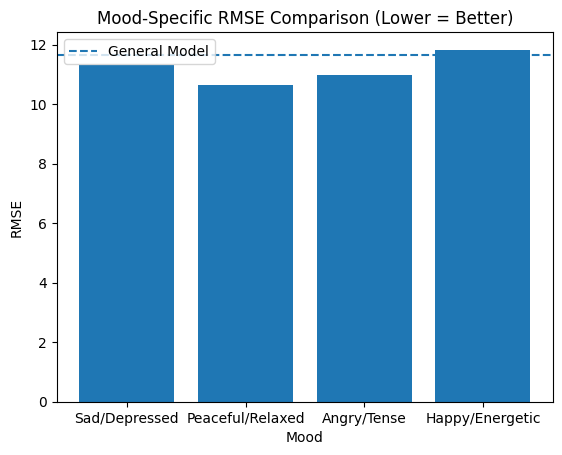

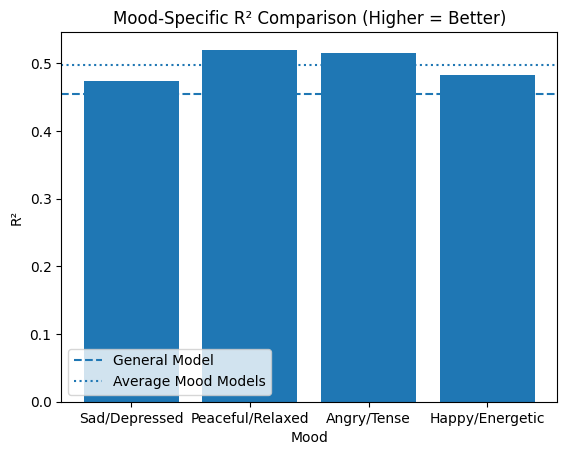

In [28]:
# 1. Collect results for easy plotting
all_moods = [m['mood'] for m in mood_metrics]
rmse_vals = [m['rmse'] for m in mood_metrics]
r2_vals = [m['r2'] for m in mood_metrics]

# 2. Add the General model as a reference
general_rmse_val = gen_rmse
general_r2_val = gen_r2

# 3. Calculate average R² across all moods
avg_r2_val = sum(r2_vals) / len(r2_vals)

# Print them out
print(f"General Model R²: {general_r2_val:.4f}")
print(f"Average Mood-based R²: {avg_r2_val:.4f}")

# 4. Plot RMSE comparison
plt.figure()
plt.bar(all_moods, rmse_vals)
plt.axhline(y=general_rmse_val, linestyle='--', label='General Model')
plt.title("Mood-Specific RMSE Comparison (Lower = Better)")
plt.xlabel("Mood")
plt.ylabel("RMSE")
plt.legend()
plt.show()

# 5. Plot R² comparison
plt.figure()
plt.bar(all_moods, r2_vals)
plt.axhline(y=general_r2_val, linestyle='--', label='General Model')
plt.axhline(y=avg_r2_val, linestyle=':', label='Average Mood Models')
plt.title("Mood-Specific R² Comparison (Higher = Better)")
plt.xlabel("Mood")
plt.ylabel("R²")
plt.legend()
plt.show()


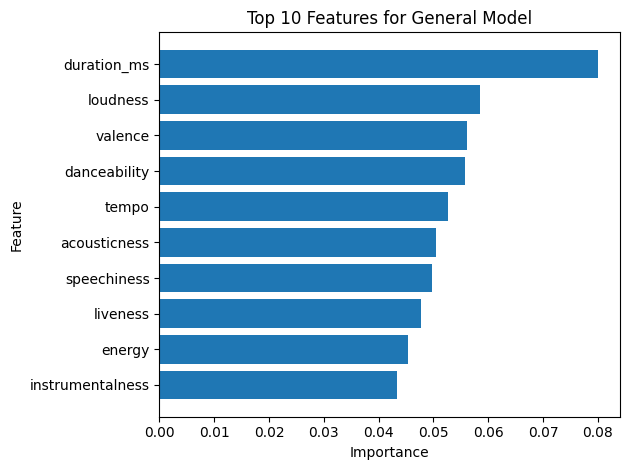

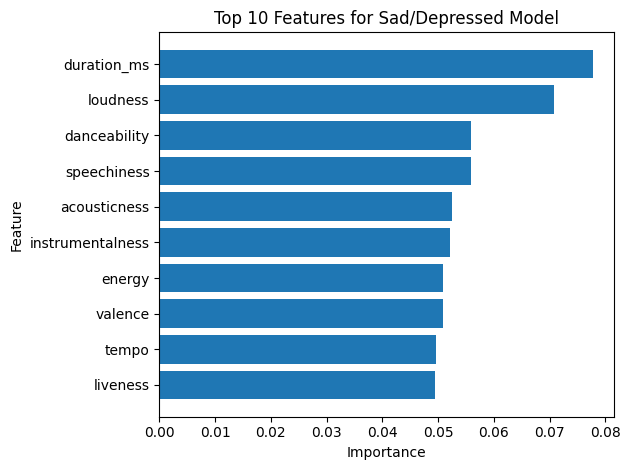

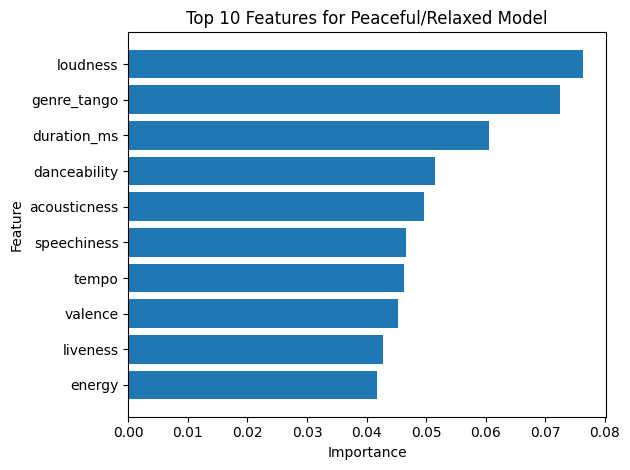

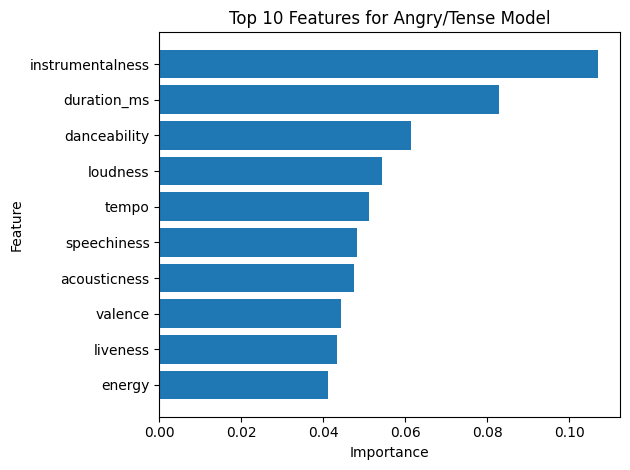

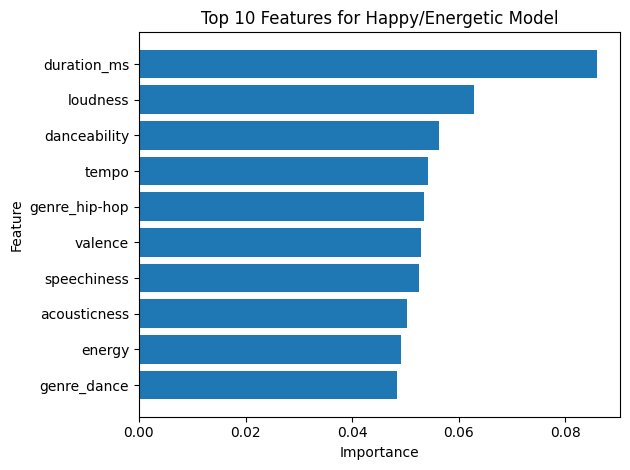

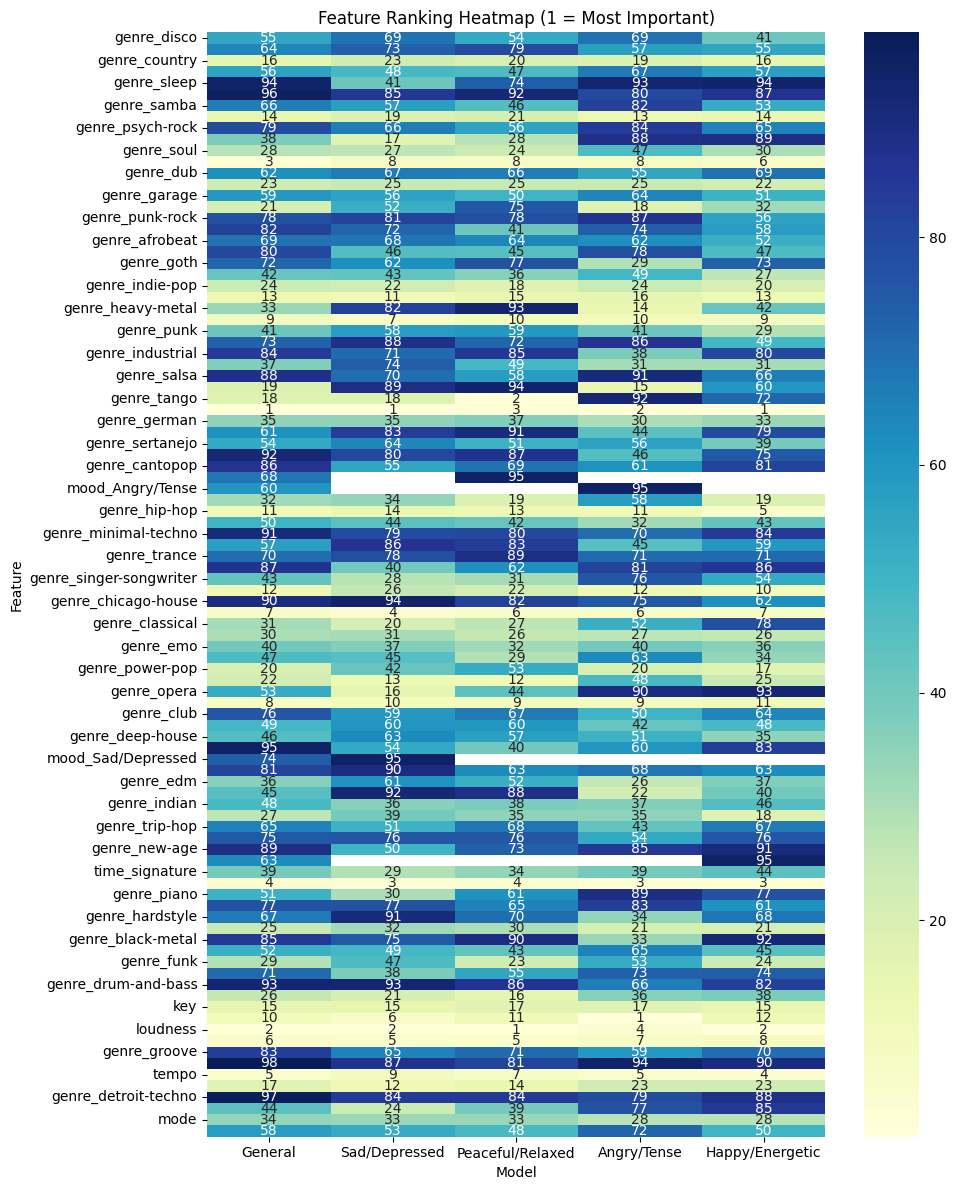

In [29]:
importances_dict = {}  # Will hold DataFrame of feature importances for each mood

# 1. Feature importances for General model
feature_names = X_general.columns  # Same columns used for training the general model
gen_importances = general_model.feature_importances_
df_gen_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': gen_importances
}).sort_values('importance', ascending=False).reset_index(drop=True)

importances_dict['General'] = df_gen_importances

# 2. Feature importances for each mood
for mood, model in mood_models.items():
    X_mood = mood_dfs_encoded[mood].drop(columns=['popularity','track_id','track_name','artist_name'], errors='ignore')
    mood_importances = model.feature_importances_
    df_mood_importances = pd.DataFrame({
        'feature': X_mood.columns,
        'importance': mood_importances
    }).sort_values('importance', ascending=False).reset_index(drop=True)
    
    importances_dict[mood] = df_mood_importances

# 3. Create individual bar charts for each model’s top features
for key, df_imp in importances_dict.items():
    plt.figure()
    # Show top 10 for readability
    top_n = 10
    df_top = df_imp.head(top_n)
    plt.barh(df_top['feature'][::-1], df_top['importance'][::-1])
    plt.title(f"Top {top_n} Features for {key} Model")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

# 4. Create a heatmap comparing feature rankings
#    First, build a DataFrame where rows = features, columns = [General, mood1, mood2, ...],
#    and values = rank of that feature in that model.
all_features = set()
for df_imp in importances_dict.values():
    all_features.update(df_imp['feature'].tolist())

all_features = list(all_features)  # convert to list to iterate
ranking_dict = {}

for feat in all_features:
    ranking_dict[feat] = {}
    for model_name, df_imp in importances_dict.items():
        # Find the rank of this feature in df_imp
        found = df_imp[df_imp['feature'] == feat]
        if found.empty:
            # Feature not present in this dataset's columns
            ranking_dict[feat][model_name] = np.nan
        else:
            # rank is the index + 1 in the sorted DataFrame
            rank = found.index[0] + 1  # 1-based ranking
            ranking_dict[feat][model_name] = rank

df_rankings = pd.DataFrame(ranking_dict).T  # transpose so that rows=features, columns=models

# Because rank "1" means "most important," smaller is better, but let's just plot them as is
plt.figure(figsize=(10, 12))
sns.heatmap(df_rankings, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Feature Ranking Heatmap (1 = Most Important)")
plt.xlabel("Model")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd

importances_dict = {}  # Will hold DataFrames of feature importances for each model

###############################################
# 1. Feature importances for the General model
###############################################
feature_names = X_general.columns
gen_importances = general_model.feature_importances_

df_gen_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': gen_importances
}).sort_values('importance', ascending=False).reset_index(drop=True)

importances_dict['General'] = df_gen_importances

######################################
# 2. Feature importances for each mood
######################################
for mood, model in mood_models.items():
    X_mood = mood_dfs_encoded[mood].drop(
        columns=['popularity','track_id','track_name','artist_name'], 
        errors='ignore'
    )
    mood_importances = model.feature_importances_
    
    df_mood_importances = pd.DataFrame({
        'feature': X_mood.columns,
        'importance': mood_importances
    }).sort_values('importance', ascending=False).reset_index(drop=True)
    
    importances_dict[mood] = df_mood_importances

##########################################################################
# 3. Build a single table for all models' top 10 features (sorted by rank)
##########################################################################
table_rows = []
top_n = 10

for model_name, df_imp in importances_dict.items():
    # Take the top 10
    df_top = df_imp.head(top_n).reset_index(drop=True)
    
    # Loop through each row in df_top
    for idx in range(len(df_top)):
        rank = idx + 1  # rank is index+1
        feature = df_top.loc[idx, 'feature']
        importance = df_top.loc[idx, 'importance']
        
        table_rows.append((model_name, rank, feature, importance))

# Create a DataFrame with columns: Model, Rank, Feature, Importance
df_all_top10 = pd.DataFrame(table_rows, columns=["Model", "Rank", "Feature", "Importance"])

# If you want to see them grouped by model in ascending order of Rank:
df_all_top10.sort_values(by=["Model", "Rank"], inplace=True)

##########################################################################
# 4. Print the combined table (without DataFrame indices)
##########################################################################
print(df_all_top10.to_string(index=False))


           Model  Rank          Feature  Importance
     Angry/Tense     1 instrumentalness    0.106996
     Angry/Tense     2      duration_ms    0.082904
     Angry/Tense     3     danceability    0.061281
     Angry/Tense     4         loudness    0.054319
     Angry/Tense     5            tempo    0.051187
     Angry/Tense     6      speechiness    0.048335
     Angry/Tense     7     acousticness    0.047567
     Angry/Tense     8          valence    0.044285
     Angry/Tense     9         liveness    0.043389
     Angry/Tense    10           energy    0.041245
         General     1      duration_ms    0.080018
         General     2         loudness    0.058548
         General     3          valence    0.056051
         General     4     danceability    0.055783
         General     5            tempo    0.052568
         General     6     acousticness    0.050488
         General     7      speechiness    0.049787
         General     8         liveness    0.047686
         Gen

## Let's try to create genre specific model

In [31]:
df_with_moods.head()

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,mood_label
0,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3,Sad/Depressed
1,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4,Peaceful/Relaxed
2,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4,Sad/Depressed
3,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4,Peaceful/Relaxed
4,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4,Angry/Tense


## Let's try Genre Specific Model! 

In [32]:
# Count occurrences of each genre
genre_counts = df_with_moods['genre'].value_counts()

# Get the top 5 genres (most frequent)
top_5_genres = genre_counts.head(5).index.tolist()

# Print the top 5 genres and their counts
print("Top 5 Genres (by frequency):")
for i, genre in enumerate(top_5_genres, start=1):
    print(f"{i}. {genre} -> {genre_counts[genre]} rows")


Top 5 Genres (by frequency):
1. black-metal -> 21837 rows
2. gospel -> 21621 rows
3. ambient -> 21389 rows
4. acoustic -> 21097 rows
5. alt-rock -> 20918 rows


# Data Prep: Scaling & Filtering

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # for saving models

# Assume df_with_moods is already in the environment.
# We'll filter it to the top 5 genres you identified: alt-rock, country, dance, folk, hip-hop.

top_5_genres = ['alt-rock', 'country', 'dance', 'folk', 'hip-hop']

# 1. Filter rows
df_top5 = df_with_moods[df_with_moods['genre'].isin(top_5_genres)].copy()

# 2. (Optional) drop columns you do NOT want
#    e.g., 'year', 'artist_popularity', etc., if they exist. 
#    Let's assume we're removing them for simplicity, as you've done before:
cols_to_drop = ['artist_popularity', 'year']  # Adjust if needed
for col in cols_to_drop:
    if col in df_top5.columns:
        df_top5.drop(columns=[col], inplace=True, errors='ignore')

# 3. Encode 'genre' and 'mood_label' as dummies
#    - drop_first=True for 'genre' to avoid dummy trap, or keep them all if you prefer 
df_top5 = pd.get_dummies(df_top5, columns=['genre'], drop_first=True)
df_top5 = pd.get_dummies(df_top5, columns=['mood_label'], drop_first=False, prefix='mood')

# 4. Scale numerical features
numerical_columns = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'
]

scaler = StandardScaler()
for col in numerical_columns:
    if col in df_top5.columns:
        df_top5[col] = scaler.fit_transform(df_top5[[col]])

print("Filtered to top-5 genres and prepared the data (encoded + scaled).")
print(f"New dataset size: {len(df_top5)} rows.")


Filtered to top-5 genres and prepared the data (encoded + scaled).
New dataset size: 87886 rows.


## Model Training

In [34]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# =============================================================================
# 1. Filter to Top-5 Genres
# =============================================================================

top_5_genres = ['alt-rock', 'country', 'dance', 'folk', 'hip-hop']

df_top5 = df_with_moods[df_with_moods['genre'].isin(top_5_genres)].copy()
print(f"Filtered dataset size (top-5 genres only): {len(df_top5)} rows.")

# =============================================================================
# 2. Drop Unwanted Columns (if present)
# =============================================================================

cols_to_drop = ['artist_popularity', 'year']  # Adjust if needed
for col in cols_to_drop:
    if col in df_top5.columns:
        df_top5.drop(columns=[col], inplace=True, errors='ignore')

# =============================================================================
# 3. Encode Genre & Mood Columns Once
#     - We set drop_first=False so that *each* of the top 5 genres
#       has its own dummy column in the final DataFrame.
# =============================================================================

df_top5 = pd.get_dummies(df_top5, columns=['genre'], drop_first=False)
df_top5 = pd.get_dummies(df_top5, columns=['mood_label'], prefix='mood', drop_first=False)

print("Dummy encoding complete. Current columns:")
print(df_top5.columns)

# =============================================================================
# 4. Scale Numeric Columns Once
# =============================================================================

numerical_columns = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'
]

scaler = StandardScaler()
for col in numerical_columns:
    if col in df_top5.columns:
        df_top5[col] = scaler.fit_transform(df_top5[[col]])

print("Scaling complete. Now training models...")

# =============================================================================
# 5. General Model (Top-5 Genres Combined)
# =============================================================================

# Define features & target
X_general = df_top5.drop(columns=['popularity', 'track_id', 'track_name', 'artist_name'], errors='ignore')
y_general = df_top5['popularity']

# Split
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_general, y_general, test_size=0.2, random_state=42)

# Train Random Forest
general_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
general_model.fit(X_train_g, y_train_g)

# Evaluate
gen_preds = general_model.predict(X_test_g)
gen_rmse = np.sqrt(mean_squared_error(y_test_g, gen_preds))
gen_r2 = r2_score(y_test_g, gen_preds)

print(f"General (top-5 genres) Model -> RMSE: {gen_rmse:.4f}, R²: {gen_r2:.4f}")

# Save the model
joblib.dump(general_model, 'model_general_top5_genres.pkl')
print("Saved 'model_general_top5_genres.pkl'.")

# =============================================================================
# 6. Genre-Specific Models
# =============================================================================

genre_models = {}
genre_metrics = []

for genre in top_5_genres:
    # The dummy column for this genre will be "genre_{genre}"
    dummy_col = f"genre_{genre}"
    
    # Just filter the *already encoded & scaled* df_top5
    # This ensures columns match exactly what the model expects.
    if dummy_col not in df_top5.columns:
        print(f"WARNING: Column '{dummy_col}' not found. Possibly it was the baseline if you had drop_first=True earlier.")
        print(f"Skipping '{genre}' since its dummy column was not created.")
        continue
    
    df_genre_specific = df_top5[df_top5[dummy_col] == 1].copy()
    
    X_genre = df_genre_specific.drop(columns=['popularity','track_id','track_name','artist_name'], errors='ignore')
    y_genre = df_genre_specific['popularity']
    
    if len(X_genre) < 50:
        # If the subset is too small, skip it
        print(f"Skipping genre '{genre}' -> only {len(X_genre)} rows.")
        continue
    
    X_train, X_test, y_train, y_test = train_test_split(X_genre, y_genre, test_size=0.2, random_state=42)
    
    genre_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    genre_model.fit(X_train, y_train)
    
    # Evaluate
    preds = genre_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    # Save the model
    model_filename = f"model_genre_{genre}.pkl"
    joblib.dump(genre_model, model_filename)
    
    print(f"Genre '{genre}' Model -> RMSE: {rmse:.4f}, R²: {r2:.4f}")
    print(f"Saved '{model_filename}'.\n")
    
    # Store metrics
    genre_models[genre] = genre_model
    genre_metrics.append({'genre': genre, 'rmse': rmse, 'r2': r2})

# Summarize Genre Results
print("=== Summary of Genre-Specific Models ===")
for m in genre_metrics:
    print(f"{m['genre']}: RMSE={m['rmse']:.4f}, R²={m['r2']:.4f}")


Filtered dataset size (top-5 genres only): 87886 rows.
Dummy encoding complete. Current columns:
Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'genre_alt-rock',
       'genre_country', 'genre_dance', 'genre_folk', 'genre_hip-hop',
       'mood_Angry/Tense', 'mood_Happy/Energetic', 'mood_Peaceful/Relaxed',
       'mood_Sad/Depressed'],
      dtype='object')
Scaling complete. Now training models...
General (top-5 genres) Model -> RMSE: 12.1179, R²: 0.2181
Saved 'model_general_top5_genres.pkl'.
Genre 'alt-rock' Model -> RMSE: 10.3148, R²: 0.0075
Saved 'model_genre_alt-rock.pkl'.

Genre 'country' Model -> RMSE: 12.4682, R²: 0.1231
Saved 'model_genre_country.pkl'.

Genre 'dance' Model -> RMSE: 13.3145, R²: 0.1339
Saved 'model_genre_dance.pkl'.

Genre 'folk' Model -> RMSE: 11.2586, R²: 0.0646
Saved 'model_genre_folk.pkl'.

Genre 'hip-ho

In [35]:
# Take a random sample to speed up execution
sample_fraction = 0.05  # Use 5% of the data
df_sample = df_with_moods.sample(frac=sample_fraction, random_state=42)
print(f"Original dataset: {len(df_with_moods)} songs")
print(f"Sampled dataset: {len(df_sample)} songs ({sample_fraction*100}%)")

# Continue with the sampled dataset
data = df_sample.copy()

Original dataset: 1159748 songs
Sampled dataset: 57987 songs (5.0%)


General model - RMSE: 7.4453, R²: 0.8117
Happy/Energetic model - RMSE: 7.9850, R²: 0.7937
Sad/Depressed model - RMSE: 7.5421, R²: 0.7865
Peaceful/Relaxed model - RMSE: 7.7174, R²: 0.7962


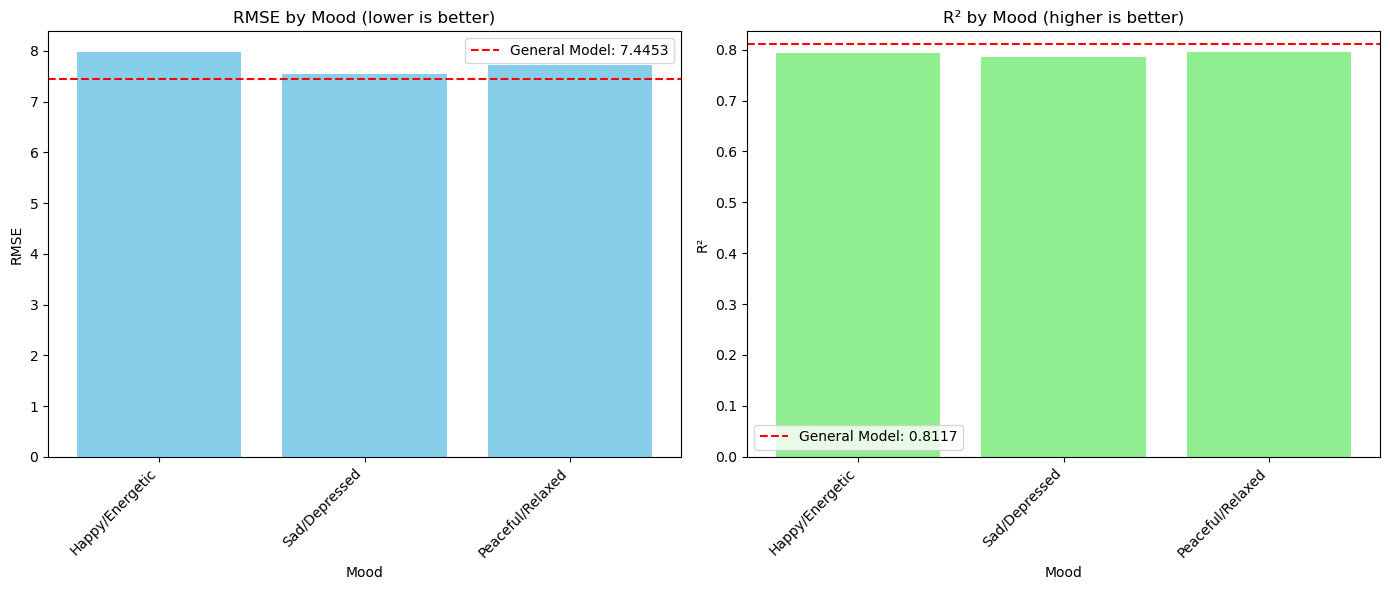

In [84]:
# First, save mood information before encoding
mood_mapping = {}
if 'mood_label' in df_with_moods.columns:
    for idx, mood in enumerate(df_with_moods['mood_label'].unique()):
        # Create mapping between original mood and encoded column name
        mood_mapping[f'mood_label_{mood}'] = mood

# Process data 
data = df_with_moods.copy()
categorical_columns = ['genre', 'mood_label']
numerical_columns = ['year', 'danceability', 'energy', 'key', 'loudness',
                     'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'artist_popularity']

# Encode categorical features
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Scale numerical features
features_to_scale = ['year', 'tempo', 'duration_ms', 'artist_popularity']
scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Now you can create a function to compare across moods using the dummy variables
def compare_general_vs_mood_specific(data, mood_mapping):
    """Compare general model vs. mood-specific models using dummy variables"""
    # General model
    X = data.drop(columns=['popularity', 'track_id', 'track_name', 'artist_name'], errors='ignore')
    y = data['popularity']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    general_model = RandomForestRegressor(n_estimators=100, random_state=42)
    general_model.fit(X_train, y_train)
    
    general_pred = general_model.predict(X_test)
    general_rmse = np.sqrt(mean_squared_error(y_test, general_pred))
    general_r2 = r2_score(y_test, general_pred)
    
    print(f"General model - RMSE: {general_rmse:.4f}, R²: {general_r2:.4f}")
    
    # Mood-specific models
    mood_results = []
    
    for mood_col, original_mood in mood_mapping.items():
        if mood_col in data.columns:
            # Filter data for this mood
            mood_data = data[data[mood_col] == 1].copy()
            
            if len(mood_data) > 100:  # Ensure enough samples
                X_mood = mood_data.drop(columns=['popularity', 'track_id', 'track_name', 'artist_name'], errors='ignore')
                y_mood = mood_data['popularity']
                
                X_train_mood, X_test_mood, y_train_mood, y_test_mood = train_test_split(
                    X_mood, y_mood, test_size=0.2, random_state=42)
                
                mood_model = RandomForestRegressor(n_estimators=100, random_state=42)
                mood_model.fit(X_train_mood, y_train_mood)
                
                mood_pred = mood_model.predict(X_test_mood)
                mood_rmse = np.sqrt(mean_squared_error(y_test_mood, mood_pred))
                mood_r2 = r2_score(y_test_mood, mood_pred)
                
                print(f"{original_mood} model - RMSE: {mood_rmse:.4f}, R²: {mood_r2:.4f}")
                
                mood_results.append({
                    'mood': original_mood,
                    'rmse': mood_rmse,
                    'r2': mood_r2,
                    'n_samples': len(mood_data)
                })
    
    # Visualize results
    moods = [result['mood'] for result in mood_results]
    rmse_values = [result['rmse'] for result in mood_results]
    r2_values = [result['r2'] for result in mood_results]
    
    plt.figure(figsize=(14, 6))
    
    # RMSE comparison
    plt.subplot(1, 2, 1)
    bars = plt.bar(moods, rmse_values, color='skyblue')
    plt.axhline(y=general_rmse, color='red', linestyle='--', label=f'General Model: {general_rmse:.4f}')
    plt.title('RMSE by Mood (lower is better)')
    plt.xlabel('Mood')
    plt.ylabel('RMSE')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    
    # R² comparison
    plt.subplot(1, 2, 2)
    bars = plt.bar(moods, r2_values, color='lightgreen')
    plt.axhline(y=general_r2, color='red', linestyle='--', label=f'General Model: {general_r2:.4f}')
    plt.title('R² by Mood (higher is better)')
    plt.xlabel('Mood')
    plt.ylabel('R²')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return {
        'general': {'rmse': general_rmse, 'r2': general_r2},
        'mood_specific': mood_results
    }

# Run the comparison
results = compare_general_vs_mood_specific(data, mood_mapping)

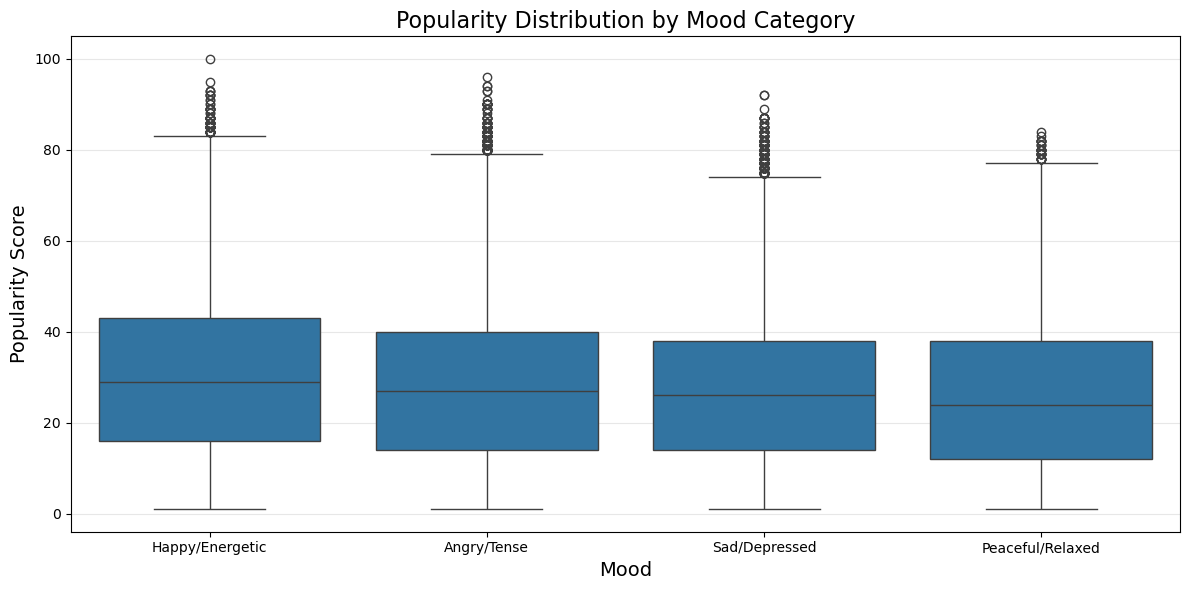

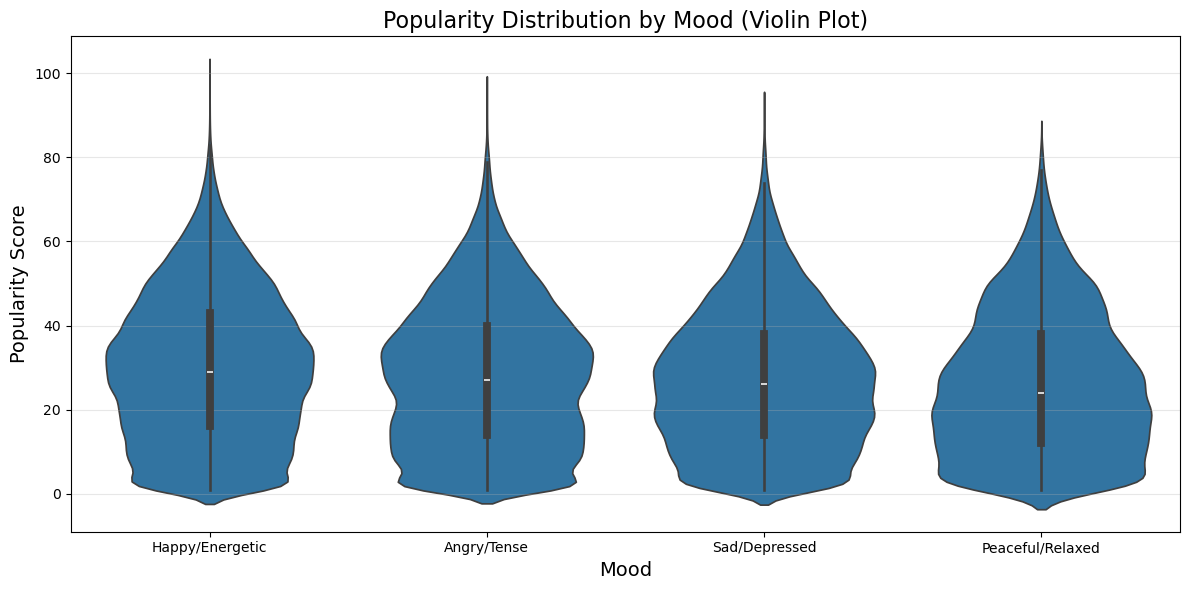

Popularity statistics by mood:
                       mean  median        std   count
mood_label                                            
Happy/Energetic   29.987169    29.0  17.570926  112700
Angry/Tense       28.158760    27.0  17.127361  121687
Sad/Depressed     27.377876    26.0  16.482864   65061
Peaceful/Relaxed  26.368377    24.0  17.045683   20403


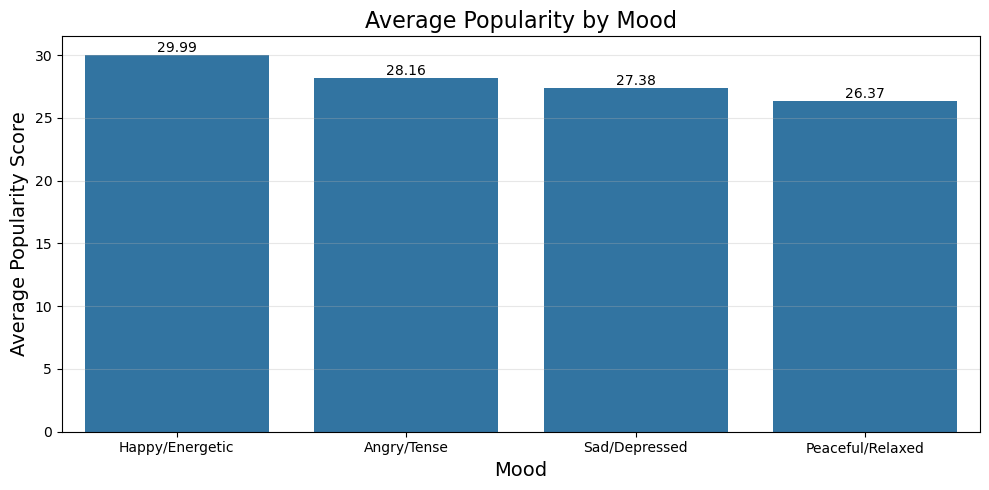

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot of popularity by mood
plt.figure(figsize=(12, 6))
sns.boxplot(x='mood_label', y='popularity', data=df_with_moods)
plt.title('Popularity Distribution by Mood Category', fontsize=16)
plt.xlabel('Mood', fontsize=14)
plt.ylabel('Popularity Score', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Add a violin plot for more detailed distribution
plt.figure(figsize=(12, 6))
sns.violinplot(x='mood_label', y='popularity', data=df_with_moods)
plt.title('Popularity Distribution by Mood (Violin Plot)', fontsize=16)
plt.xlabel('Mood', fontsize=14)
plt.ylabel('Popularity Score', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and display mean popularity by mood
mood_popularity = df_with_moods.groupby('mood_label')['popularity'].agg(['mean', 'median', 'std', 'count'])
mood_popularity = mood_popularity.sort_values('mean', ascending=False)

print("Popularity statistics by mood:")
print(mood_popularity)

# Create a bar chart of mean popularity by mood
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=mood_popularity.index, y=mood_popularity['mean'])
plt.title('Average Popularity by Mood', fontsize=16)
plt.xlabel('Mood', fontsize=14)
plt.ylabel('Average Popularity Score', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Add the actual values on top of each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom')

plt.tight_layout()
plt.show()

In [96]:
# Create a dictionary to store the trained models
mood_models = {}

# The general model training code might look like:
X = data.drop(columns=['popularity', 'track_id', 'track_name', 'artist_name'], errors='ignore')
y = data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
general_model = RandomForestRegressor(n_estimators=100, random_state=42)
general_model.fit(X_train, y_train)

# Store the general model
mood_models['General'] = general_model

# For each mood, train a separate model and store it:
for mood_col, original_mood in mood_mapping.items():
    if mood_col in data.columns:
        # Filter data for this mood
        mood_data = data[data[mood_col] == 1].copy()
        
        if len(mood_data) > 100:  # Ensure enough samples
            X_mood = mood_data.drop(columns=['popularity', 'track_id', 'track_name', 'artist_name'], errors='ignore')
            y_mood = mood_data['popularity']
            
            X_train_mood, X_test_mood, y_train_mood, y_test_mood = train_test_split(
                X_mood, y_mood, test_size=0.2, random_state=42)
            
            mood_model = RandomForestRegressor(n_estimators=100, random_state=42)
            mood_model.fit(X_train_mood, y_train_mood)
            
            # Store the model
            mood_models[original_mood] = mood_model

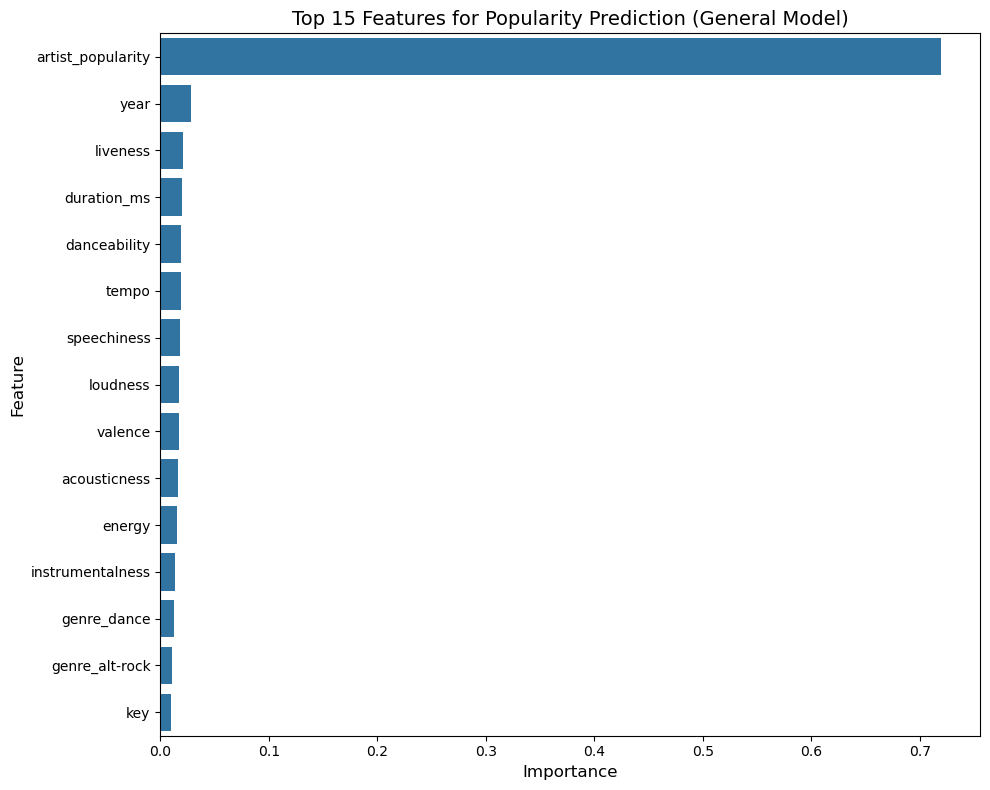

In [97]:
# Get feature importances from the general model
X = data.drop(columns=['popularity', 'track_id', 'track_name', 'artist_name'], errors='ignore')
y = data['popularity']

# Train a model on a small sample for speed
sample_size = min(5000, len(X))
sample_indices = np.random.choice(len(X), sample_size, replace=False)
X_sample = X.iloc[sample_indices]
y_sample = y.iloc[sample_indices]

# Train a quick model
quick_model = RandomForestRegressor(n_estimators=50, random_state=42)
quick_model.fit(X_sample, y_sample)

# Get feature importances
features = X.columns
importances = pd.DataFrame({
    'feature': features,
    'importance': quick_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importances.head(15))
plt.title('Top 15 Features for Popularity Prediction (General Model)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

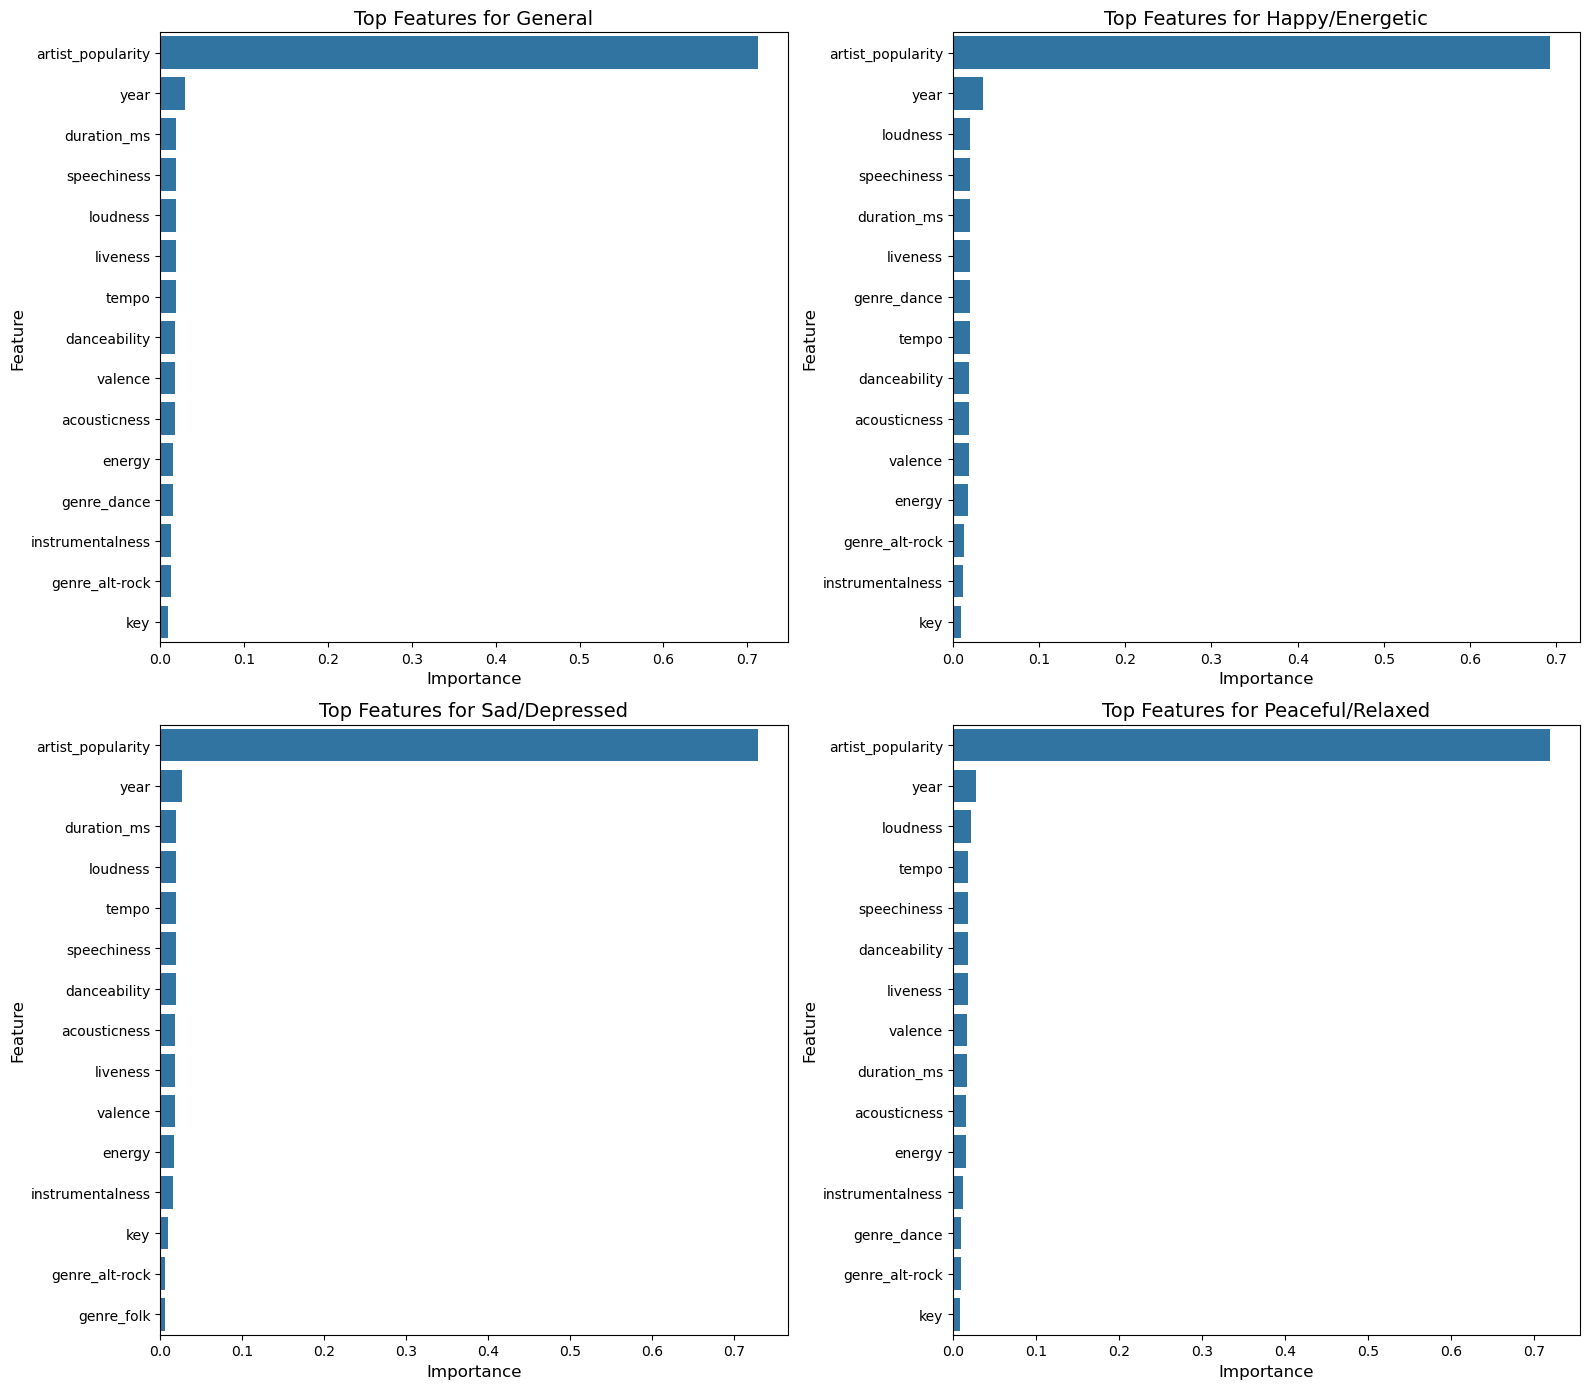

{'General': array([3.00207830e-02, 1.81099172e-02, 1.54402855e-02, 9.23404102e-03,
        1.85807792e-02, 1.88851240e-03, 1.86589669e-02, 1.71651083e-02,
        1.32300994e-02, 1.83665274e-02, 1.74779082e-02, 1.82861334e-02,
        1.87318313e-02, 1.54065995e-03, 7.12242513e-01, 1.27293683e-02,
        5.06759665e-04, 1.73622982e-04, 7.86622590e-04, 1.81520992e-04,
        8.13726560e-05, 8.06131841e-04, 5.66968354e-04, 3.22672360e-04,
        7.80307863e-05, 3.15362473e-03, 1.46389532e-02, 4.51893426e-04,
        2.85993190e-04, 7.96062888e-04, 2.71706621e-05, 5.41941647e-04,
        3.62086699e-04, 5.38999471e-04, 3.57731900e-04, 1.23755385e-03,
        1.30353791e-03, 5.99261552e-04, 4.76577482e-04, 3.15996466e-03,
        4.97883483e-04, 3.27910555e-04, 3.29906122e-04, 3.24232405e-04,
        1.71965479e-05, 4.23795068e-04, 2.59435025e-04, 2.87534388e-04,
        5.57129504e-04, 4.08121783e-04, 1.00604581e-04, 1.96903221e-03,
        2.91900459e-04, 1.58323167e-03, 2.16623721e-0

In [100]:
# Get feature importances for each mood model
def visualize_mood_feature_importances(mood_models, features):
    """
    Visualize feature importances for each mood model
    
    Parameters:
    mood_models (dict): Dictionary of trained models by mood
    features (list/Index): List of feature names
    """
    # Create a figure with subplots - one for each mood
    num_moods = len(mood_models)
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    axes = axes.flatten()
    
    # Process each mood model
    for i, (mood, model) in enumerate(mood_models.items()):
        if i < len(axes):  # Make sure we don't exceed available subplots
            # Extract feature importances
            importances = pd.DataFrame({
                'feature': features,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            # Plot top 15 features (or fewer if not available)
            top_n = min(15, len(importances))
            sns.barplot(x='importance', y='feature', data=importances.head(top_n), ax=axes[i])
            axes[i].set_title(f'Top Features for {mood}', fontsize=14)
            axes[i].set_xlabel('Importance', fontsize=12)
            axes[i].set_ylabel('Feature', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    return {mood: model.feature_importances_ for mood, model in mood_models.items()}

# Run the visualization with your existing mood_models
visualize_mood_feature_importances(mood_models, features)

In [102]:
# Check which mood columns exist in the data
mood_columns = [col for col in data.columns if 'mood_label' in col]
print("Mood columns in the data:", mood_columns)

# Check how many songs are in each mood category
for mood_col in mood_columns:
    count = data[data[mood_col] == 1].shape[0]
    print(f"{mood_col}: {count} songs")

Mood columns in the data: ['mood_label_Happy/Energetic', 'mood_label_Peaceful/Relaxed', 'mood_label_Sad/Depressed']
mood_label_Happy/Energetic: 112700 songs
mood_label_Peaceful/Relaxed: 20403 songs
mood_label_Sad/Depressed: 65061 songs
